In [96]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import cv2
print(cv2.__version__)
import numpy as np
# import all the packages needed for Hough Transform
from skimage import color
from skimage.feature import canny
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.draw import circle_perimeter, circle
import scipy as sc
import statistics as stats
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot, qqline
sns.set(style="ticks")
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"

4.2.0


In [2]:
#Load start and finish frames for first and last trial

path = r"E:\Downloads\ManducaMultiSenseData\Centroids_Filtered"

path_FL = r"E:\Downloads\ManducaMultiSenseData\Motion\Centroid_First_Last"

out_path = r"E:\Downloads\ManducaMultiSenseData\Motion"


video_path = r"E:\Downloads\ManducaMultiSenseData\Videos"

file_list = glob.glob(path + "\\" + '*.csv')


In [3]:
name_list = [name[54:-4] for name in file_list]
name_list_ = []

for name in name_list:
    if name.startswith('L0.1'):
        name = name[:12]
        if name.endswith('_'):
            name = name[:-1]
    elif name.startswith('L50'):
        name = name[:11]
        if name.endswith('_'):
            name = name[:-1]
    
    name_list_.append(name)
#     print(name)
name_list = name_list_

In [4]:
name_list = set(name_list)

In [5]:
for name in name_list:
    
    file_path = glob.glob(path + "\\" + name + '*.csv')
    
    df1=[]
    df2=[]
    df3=[]
    df4=[]
    df5=[]
    df6=[]
    
    for fpath in file_path:
        df = pd.read_csv(fpath)
        VisitNumber= df['VisitNumber']
        FrameNumber = df['FrameNumber']
        X_position = df['X_position']
        Y_position = df['Y_position']
        
        
        df1.extend(FrameNumber)
        df2.extend(VisitNumber)
        
        df4.extend(X_position)
        df5.extend(Y_position)
        
    #generate dataframe
    n = len(df1)*[name]
    
    
    new_df = (pd.DataFrame({
                        'FrameNumber': df1, 'visit': df2, 'name' : n, 'X_position' : df4, 'Y_position' : df5}))
    first = new_df[new_df.visit == min(new_df.visit)]
    last = new_df[new_df.visit == max(new_df.visit)]
    first.to_csv(path_FL + "\\first" + name +".csv")
    last.to_csv(path_FL + "\\last" + name + ".csv" )

    

In [6]:
#Sort the moths into either first or last trial 

Trial = ['first', 'last']

for Trial in Trial:
        
    Trial_list = glob.glob(path_FL + "\\" + Trial + "L"+ '*.csv')



    df_1=[]
    
    df_3=[]
    df_4=[]
    df_5=[]
    df_6 = []

    
    for fpath in Trial_list:
        df_Trial = pd.read_csv(fpath)
        
        if len(df_Trial.index) <= 0:
            print(fpath, len(df_Trial.index))
        
        
        FrameNumber = df_Trial['FrameNumber']
        name = df_Trial['name']
        
    
        X_position = df_Trial['X_position']
        Y_position = df_Trial['Y_position']

        df_1.extend(FrameNumber)
        
        df_3.extend(name)
        df_4.extend(X_position)
        df_5.extend(Y_position)
        df_6.extend(len(X_position)*[Trial])
    
       
        

    all_df = (pd.DataFrame({
                            'FrameNumber': df_1, 'name' : df_3, 'X_position' : df_4, 'Y_position' : df_5, 'Visit': df_6}))
    
    
    all_df.to_csv(path_FL + "\\" + Trial + "_Allmoths.csv")

In [7]:
import glob


dFrame = pd.DataFrame()

file = glob.glob(path_FL + "\\" + '*Allmoths.csv')

for file in file:
    print(file)
    df = pd.read_csv(file)
    dFrame = dFrame.append(df)
dFrame.to_csv(path_FL  + "\\" + "First_Last_Visit_EveryMoth.csv")

E:\Downloads\ManducaMultiSenseData\Motion\Centroid_First_Last\first_Allmoths.csv
E:\Downloads\ManducaMultiSenseData\Motion\Centroid_First_Last\last_Allmoths.csv


In [8]:
FL_df = pd.read_csv(path_FL + "\\" + 'First_Last_Visit_Everymoth.csv')
 
nam_51 = FL_df.name.unique()
len(nam_51)

54

In [9]:
FL_df

Unnamed: 0  Unnamed: 0.1  FrameNumber          name  X_position  \
0                0             0        20377  L0.1_c-3_m10    3.768007   
1                1             1        20378  L0.1_c-3_m10    5.043560   
2                2             2        20379  L0.1_c-3_m10    5.182808   
3                3             3        20380  L0.1_c-3_m10    3.655917   
4                4             4        20381  L0.1_c-3_m10    3.766738   
...            ...           ...          ...           ...         ...   
157800       54007         54007        66195    L50_c-3_m9   17.456463   
157801       54008         54008        66196    L50_c-3_m9   14.224201   
157802       54009         54009        66197    L50_c-3_m9   17.688530   
157803       54010         54010        66198    L50_c-3_m9   14.317658   
157804       54011         54011        66199    L50_c-3_m9   14.108063   

        Y_position  Visit  
0        14.025321  first  
1        14.974423  first  
2        14.451247  first  
3        13.818836  first  
4        13.791678  first  
...            ...    ...  
157800    3.882905   last  
157801    5.907761   last  
157802    3.551380   last  
157803    5.300290   last  
157804    5.452122   last  

[157805 rows x 7 columns]

In [10]:
rad_n = []
rad_nf = []
rad_nan_lo = [] 
rad_nan_hi = []
theta_0 = []
theta_f = []

for name in nam_51:
    print(name)
    
    video_list = glob.glob(video_path + '\\' + name[0] + '*.mp4')
    video_list
    vid = cv2.VideoCapture(video_list[0])

    width = vid.get(3)
    height = vid.get(4)
    
    ret = vid.set(1,1)
    
    
    ret, frame = vid.read(1)

    # plt.imshow(frame)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5,5), 0)

    edges = canny(blurred, sigma = 5)

    hough_radii = np.arange(50, 150, 1)
    hough_res = hough_circle(edges, hough_radii)
    accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                               total_num_peaks=1)
    print(cx[0], cy[0])
    # read out points & subtract and plot for a window of frames


    x_low = FL_df[(FL_df.name == name) & (FL_df.name.str.contains('L0.1'))].X_position - cx[0]*2.5/74

    y_low = FL_df[(FL_df.name == name) & (FL_df.name.str.contains('L0.1'))].Y_position - cy[0]*2.5/74

    x_high = FL_df[(FL_df.name == name) & (FL_df.name.str.contains('L50'))].X_position - cx[0]*2.5/74

    y_high = FL_df[(FL_df.name == name) & (FL_df.name.str.contains('L50'))].Y_position - cy[0]*2.5/74

    x_000 = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('first'))].X_position - cx[0]*2.5/74

    y_000 = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('first'))].Y_position - cy[0]*2.5/74

    x_fff = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('last'))].X_position - cx[0]*2.5/74

    y_fff = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('last'))].Y_position - cy[0]*2.5/74


    # find out vector for each frame
    
    theta_first = list(np.arctan2(y_000, x_000)*180/np.pi)

    rad_nan_low = np.linalg.norm([x_low,y_low], axis = 0)/(radii[0]/74)


    theta_last = list(np.arctan2(y_fff, x_fff)*180/np.pi) 
    
    rad_nan_high = np.linalg.norm([x_high,y_high], axis = 0)/(radii[0]/74)



    rad_nan0  = np.linalg.norm([x_000,y_000], axis = 0)/(radii[0]/74)
    


    rad_nanf = np.linalg.norm([x_fff,y_fff], axis = 0)/(radii[0]/74)

    rad_n.extend(list(rad_nan0))
    rad_nf.extend(list(rad_nanf))
    rad_nan_hi.extend(list(rad_nan_high))
    rad_nan_lo.extend(list(rad_nan_low))
    theta_0.extend(theta_first)
    theta_f.extend(theta_last)

L0.1_c-3_m10
310 233
L0.1_c-3_m12
310 233
L0.1_c-3_m2
310 233
L0.1_c-3_m20
310 233
L0.1_c-3_m21
310 233
L0.1_c-3_m22
310 233
L0.1_c-3_m23
310 233
L0.1_c-3_m24
310 233
L0.1_c-3_m25
310 233
L0.1_c-3_m27
310 233
L0.1_c-3_m32
310 233
L0.1_c-3_m34
310 233
L0.1_c-3_m37
310 233
L0.1_c-3_m38
310 233
L0.1_c-3_m39
310 233
L0.1_c-3_m40
310 233
L0.1_c-3_m41
310 233
L0.1_c-3_m43
310 233
L0.1_c-3_m44
310 233
L0.1_c-3_m45
310 233
L0.1_c-3_m46
310 233
L0.1_c-3_m47
310 233
L0.1_c-3_m48
310 233
L0.1_c-3_m49
310 233
L0.1_c-3_m5
310 233
L0.1_c-3_m50
310 233
L0.1_c-3_m54
310 233
L0.1_c-3_m57
310 233
L0.1_c-3_m8
310 233
L50_c-3_m10
310 233
L50_c-3_m12
310 233
L50_c-3_m13
310 233
L50_c-3_m14
310 233
L50_c-3_m15
310 233
L50_c-3_m2
310 233
L50_c-3_m21
310 233
L50_c-3_m22
310 233
L50_c-3_m24
310 233
L50_c-3_m26
310 233
L50_c-3_m30
310 233
L50_c-3_m32
310 233
L50_c-3_m33
310 233
L50_c-3_m34
310 233
L50_c-3_m35
310 233
L50_c-3_m37
310 233
L50_c-3_m38
310 233
L50_c-3_m39
310 233
L50_c-3_m45
310 233
L50_c-3_m49
310

In [11]:
rad_list_FL = []
rad_list_FL.extend(rad_n)
rad_list_FL.extend(rad_nf)
theta_list_FL = []
theta_list_FL.extend(theta_0)
theta_list_FL.extend(theta_f)
theta_list_FL
theta_positive_FL = []
for element in theta_list_FL:
    if element <= 0:
        element = element + 360
    else:
        element = element
    theta_positive_FL.append(element)

In [12]:
theta_list_FL[6], theta_positive_FL[6]

(130.77093580627778, 130.77093580627778)

In [13]:
len(rad_list_FL), len(theta_positive_FL)

(157805, 157805)

In [14]:
label = {'0.1': 'low', '50': 'high'}
FL_df['lightLevel'] = FL_df['name'].map(lambda x : "LOW" if "0.1" in x else "HIGH" if "50" in x else "")
FL_df['Radial_Length'] = pd.Series(rad_list_FL, index=FL_df.index)
FL_df['Theta'] = pd.Series(theta_positive_FL, index=FL_df.index)
FL_df.to_csv(path_FL  + "\\" + "First_Last_Visit_EveryMoth.csv")

In [15]:
FL_df.head()

Unnamed: 0  Unnamed: 0.1  FrameNumber          name  X_position  \
0           0             0        20377  L0.1_c-3_m10    3.768007   
1           1             1        20378  L0.1_c-3_m10    5.043560   
2           2             2        20379  L0.1_c-3_m10    5.182808   
3           3             3        20380  L0.1_c-3_m10    3.655917   
4           4             4        20381  L0.1_c-3_m10    3.766738   

   Y_position  Visit lightLevel  Radial_Length       Theta  
0   14.025321  first        LOW       9.100801  137.454838  
1   14.974423  first        LOW       8.940264  127.394455  
2   14.451247  first        LOW       8.442589  128.800058  
3   13.818836  first        LOW       9.046635  138.898483  
4   13.791678  first        LOW       8.945426  138.562931

In [16]:
median_radial_length_low_first = []
median_radial_length_high_first = []
iqr_lowf= []
iqr_highf = []   
median_radial_length_low_last = []
median_radial_length_high_last = []
iqr_lowl= []
iqr_highl = [] 
i= 0
for name in nam_51:
    radial_list_first = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('first'))].Radial_Length
    useful_radial_list_first = list(radial_list_first[~np.isnan(radial_list_first)])
    radial_list_last = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('last'))].Radial_Length
    useful_radial_list_last = list(radial_list_last[~np.isnan(radial_list_last)])
    if name.startswith('L0.1'):
        
        if np.any(useful_radial_list_first) & np.any(useful_radial_list_last):
            i+=1
            med_lf = stats.median(useful_radial_list_first)
            iqr_lf = sc.stats.iqr(useful_radial_list_first)
            median_radial_length_low_first.append(med_lf)
            iqr_lowf.append(iqr_lf)
            med_ll = stats.median(useful_radial_list_last)
            iqr_ll = sc.stats.iqr(useful_radial_list_last)
            median_radial_length_low_last.append(med_ll)
            iqr_lowl.append(iqr_ll)
        elif np.any(useful_radial_list_first):
            print(name)
            med_lf = stats.median(useful_radial_list_first)
            iqr_lf = sc.stats.iqr(useful_radial_list_first)
            median_radial_length_low_first.append(med_lf)
    elif name.startswith('L50'):
        if np.any(useful_radial_list_first) & np.any(useful_radial_list_last):
            med_hf = stats.median(useful_radial_list_first)
            median_radial_length_high_first.append(med_hf)
            iqr_hf = sc.stats.iqr(useful_radial_list_first)
            iqr_highf.append(iqr_hf)
            med_hl = stats.median(useful_radial_list_last)
            median_radial_length_high_last.append(med_hl)
            iqr_hl = sc.stats.iqr(useful_radial_list_last)
            iqr_highl.append(iqr_hl)
        elif np.any(useful_radial_list_first):
            print(name)
            med_hf = stats.median(useful_radial_list_first)
            median_radial_length_high_first.append(med_hf)
            iqr_hf = sc.stats.iqr(useful_radial_list_first)
            iqr_highf.append(iqr_hf)
len(nam_51), len(median_radial_length_low_first), len(median_radial_length_low_last), len(median_radial_length_high_first), len(median_radial_length_high_last)

(54, 29, 29, 25, 25)

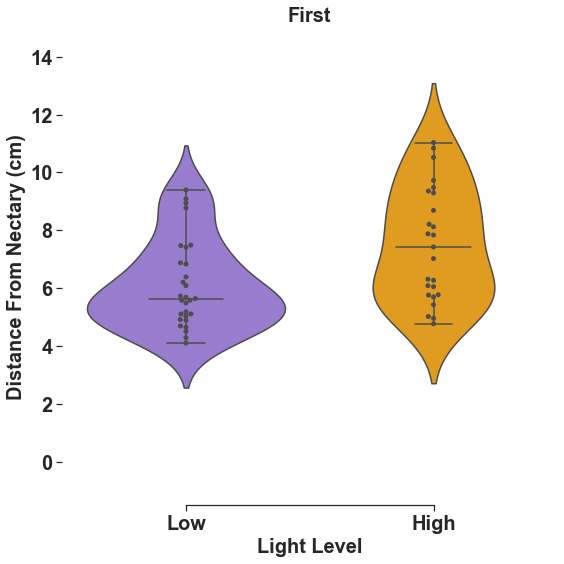

In [78]:
# Plotting the distribution of medians comparing light levels only considering the first trial
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(8,8))
data_median_first = median_radial_length_low_first + median_radial_length_high_first
data_median_first
light = ["Low"]*len(median_radial_length_low_first)
light.extend(["High"]*len(median_radial_length_high_first))
vdf_f = (pd.DataFrame({'Radial_distance_inradii': data_median_first, 'Light_Level': light}))

sns.violinplot(x = 'Light_Level', y= 'Radial_distance_inradii', data = vdf_f, inner = None,
           palette=['mediumpurple','orange'])
sns.boxplot(x='Light_Level', y ='Radial_distance_inradii', data = vdf_f, width = 0.3)
sns.swarmplot(x='Light_Level', y ='Radial_distance_inradii', data = vdf_f,
            size=5, color="0.3", linewidth=0)
plt.title('First', size = 20, weight = 'bold')

plt.ylim(-1.5,15)
ax.xaxis.grid(False)
plt.yticks(size = 20, weight = 'bold')
plt.xticks([0,1], size = 20, weight = 'bold')
plt.xlabel('Light Level', size = 20, weight = 'bold')
plt.ylabel('Distance From Nectary (cm)', size = 20, weight = 'bold')
sns.despine(trim=True, left=True)
plt.tight_layout()

# plt.savefig(out_path + "\\Kinematics\Violin\\First_Distance_Radius.png")

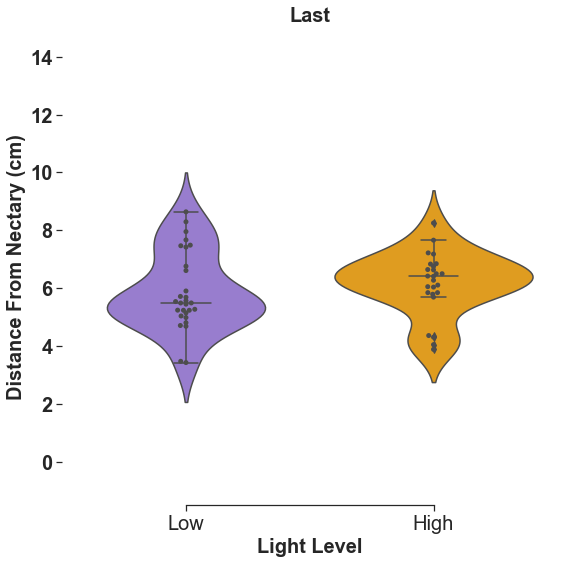

In [85]:
# Plotting the distribution of medians comparing light levels only considering the last trial
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(8, 8))

data_median_last = median_radial_length_low_last + median_radial_length_high_last
light_l = ["Low"]*len(median_radial_length_low_last)
light_l.extend(["High"]*len(median_radial_length_high_last))
vdf_l = (pd.DataFrame({'Radial distance (in cm)': data_median_last, 'Light Level': light_l}))

sns.violinplot(x='Light Level', y ='Radial distance (in cm)', data = vdf_l, inner=None,
           palette=['mediumpurple','orange'])
sns.boxplot(x='Light Level', y ='Radial distance (in cm)', data = vdf_l, width = 0.2)
sns.swarmplot(x='Light Level', y ='Radial distance (in cm)', data = vdf_l,
            size=5, color="0.3", linewidth=0)
plt.title('Last', size = 20, weight = 'bold')

ax.xaxis.grid(False)
plt.ylim(-1.5,15)
plt.yticks(size = 20, weight = 'bold')
plt.xticks([0,1], size = 20)
plt.xlabel('Light Level', size = 20, weight = 'bold')
plt.ylabel('Distance From Nectary (cm)', size = 20, weight = 'bold')
sns.despine(trim=True, left=True)
sns.despine(trim=True, left=True)
plt.tight_layout()

# plt.savefig(out_path + "\\Kinematics\Violin\\Last_Distance_Radius.png")

(0.9012755751609802, 0.01051207073032856) low_first
(0.9351164698600769, 0.11412525177001953) high_first


(None, None)

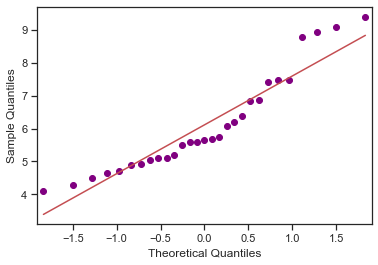

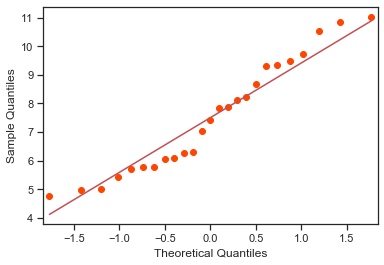

In [97]:
qqplot(np.asarray(median_radial_length_low_first), line='s', c = "purple"), qqplot(np.asarray(median_radial_length_high_first), line='s', c = "orangered")
print(sc.stats.shapiro(median_radial_length_low_first), 'low_first'),  print(sc.stats.shapiro(median_radial_length_high_first), 'high_first')

(0.9269580245018005, 0.04591095447540283) low_last
(0.9239128828048706, 0.06294699758291245) high_last


(None, None)

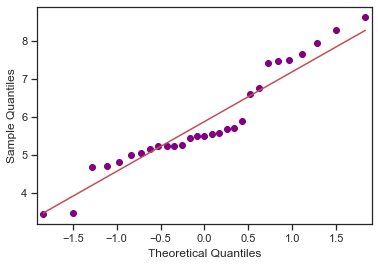

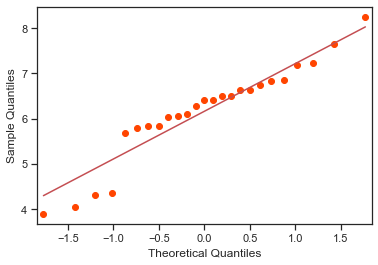

In [98]:
qqplot(np.asarray(median_radial_length_low_last), line='s', c = "purple"), qqplot(np.asarray(median_radial_length_high_last), line='s', c = "orangered")
print(sc.stats.shapiro(median_radial_length_low_last), 'low_last'),  print(sc.stats.shapiro(median_radial_length_high_last), 'high_last')

In [34]:
high_ratio_list = moth_data[(moth_data.Light_Level.str.contains("high"))].ratio.values
low_ratio_list = moth_data[(moth_data.Light_Level.str.contains("low"))].ratio.values
qqplot(low_ratio_list, line='s', c = "purple"), qqplot(high_visit_list, line='s', c = "orangered")
print(sc.stats.shapiro(low_ratio_list), 'low_ratio'),  print(sc.stats.shapiro(high_ratio_list), 'high_ratio')

(Ks_2sampResult(statistic=0.4606896551724138, pvalue=0.004198059335619564),
 MannwhitneyuResult(statistic=279.0, pvalue=0.07494663150301752))

In [36]:
n_bins = 50

(Ks_2sampResult(statistic=0.3917241379310345, pvalue=0.022959104589247104),
 MannwhitneyuResult(statistic=202.0, pvalue=0.002754814632661783))

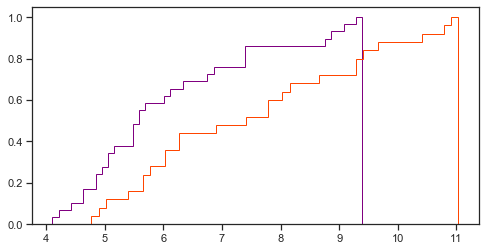

In [86]:
#KS test looks at the largest gap between both cumulative distributions
fig, ax = plt.subplots(figsize=(8, 4))
n, bins, patches = ax.hist(median_radial_length_low_first, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical', color = 'purple')
n, bins, patches = ax.hist(median_radial_length_high_first, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical', color = 'orangered')
sc.stats.ks_2samp(median_radial_length_low_first, median_radial_length_high_first), sc.stats.mannwhitneyu(median_radial_length_low_first, median_radial_length_high_first)

(Ks_2sampResult(statistic=0.4606896551724138, pvalue=0.004198059335619564),
 MannwhitneyuResult(statistic=279.0, pvalue=0.07494663150301752))

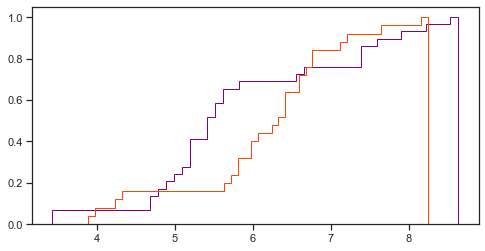

In [88]:
#U-test looks at the probability of a value in blue exceeding a value in orange since it flip flops its not significant
fig, ax = plt.subplots(figsize=(8, 4))
n, bins, patches = ax.hist(median_radial_length_low_last, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical', color = 'purple')
n, bins, patches = ax.hist(median_radial_length_high_last, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical', color = 'orangered')
sc.stats.ks_2samp(median_radial_length_low_last, median_radial_length_high_last), sc.stats.mannwhitneyu(median_radial_length_low_last, median_radial_length_high_last)

C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


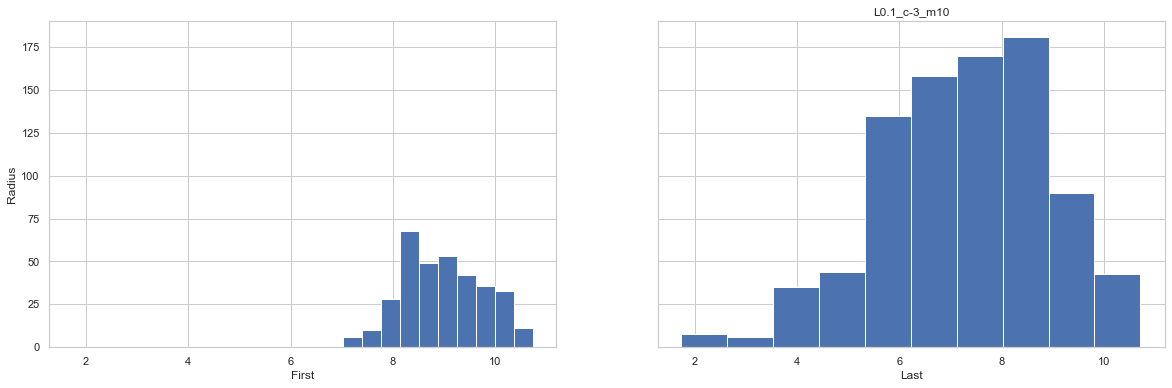

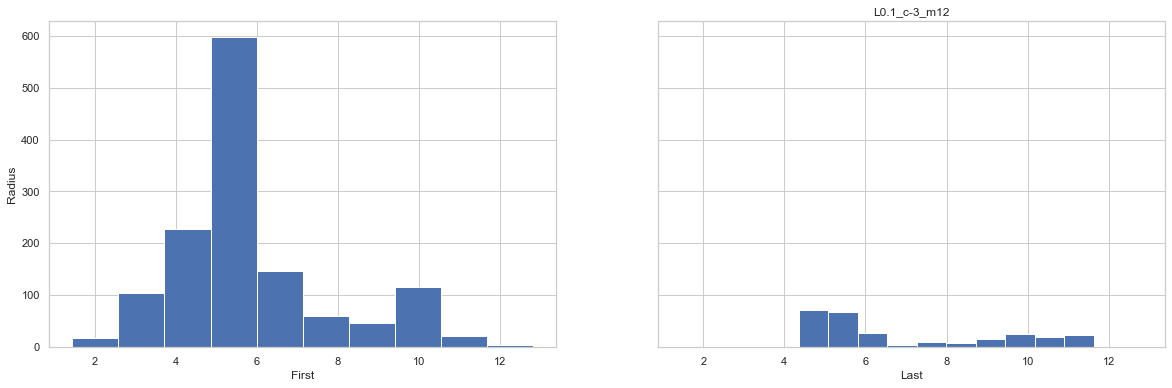

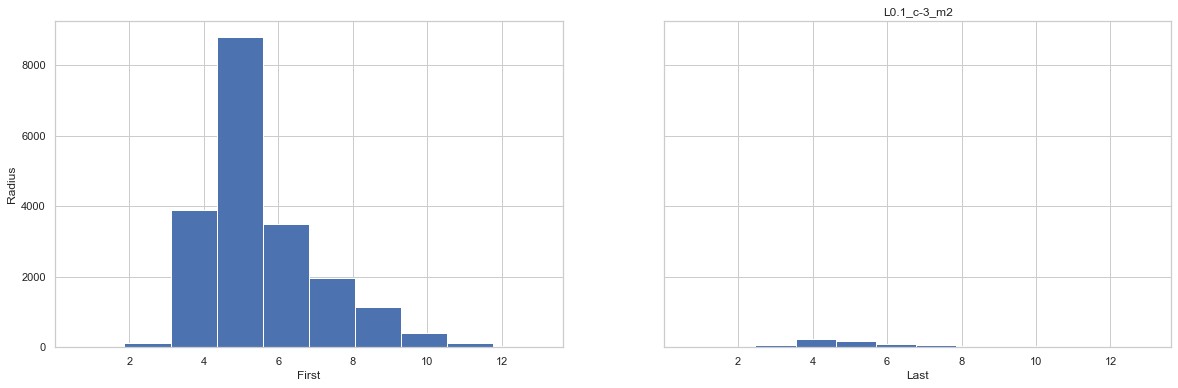

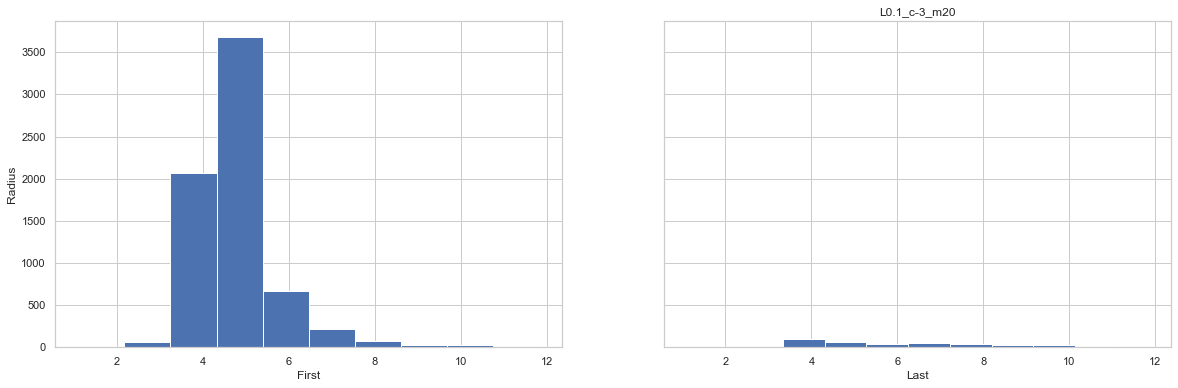

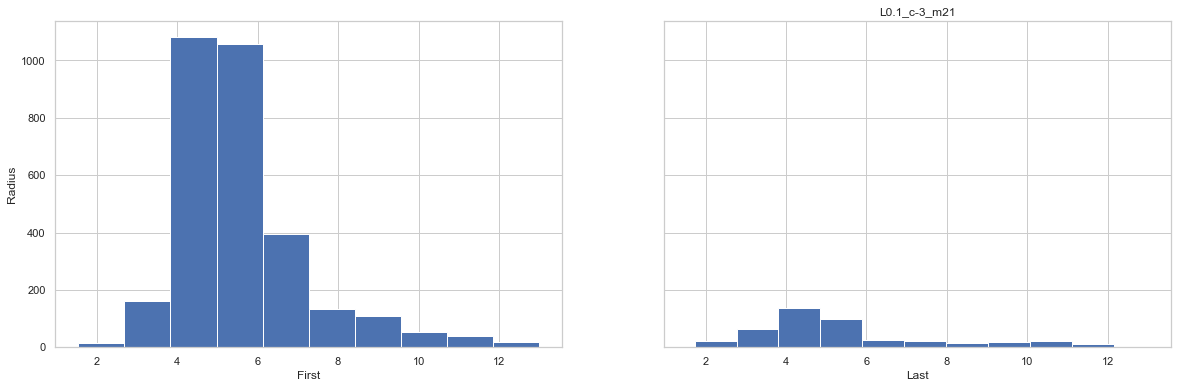

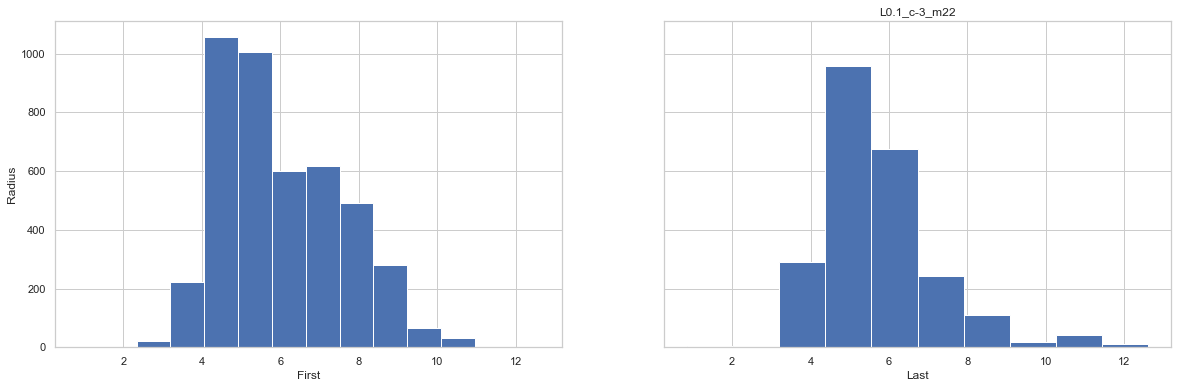

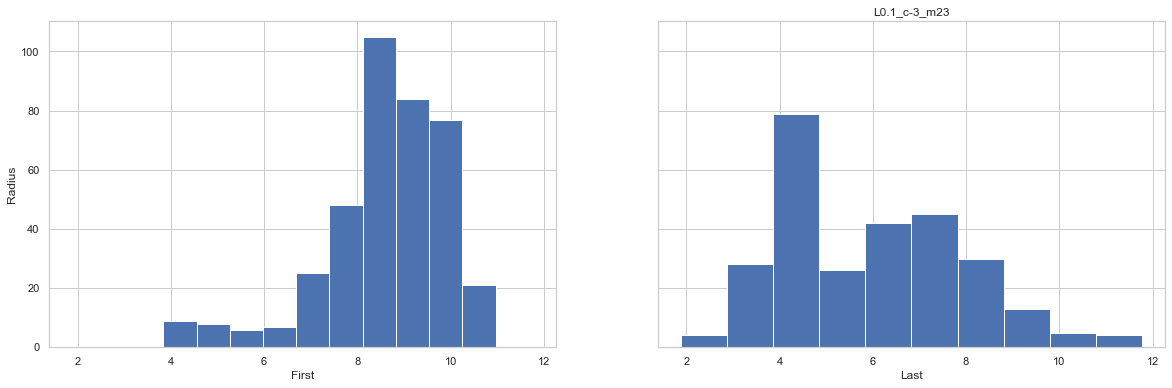

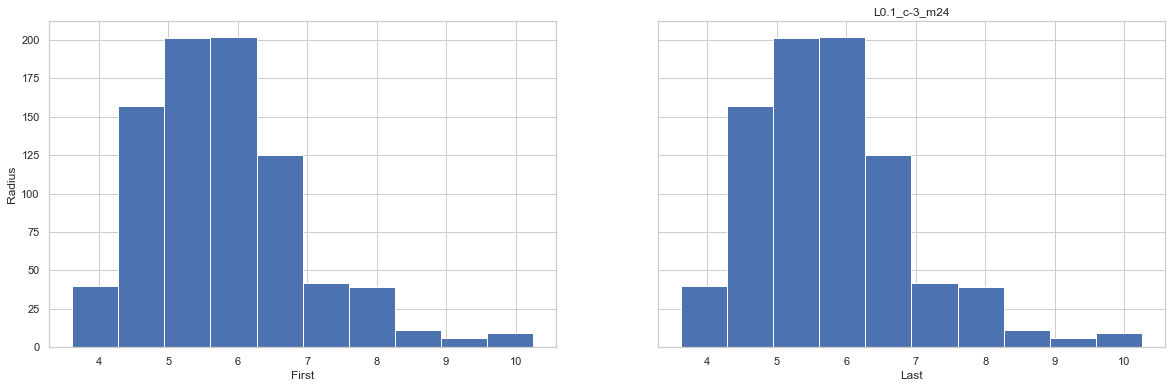

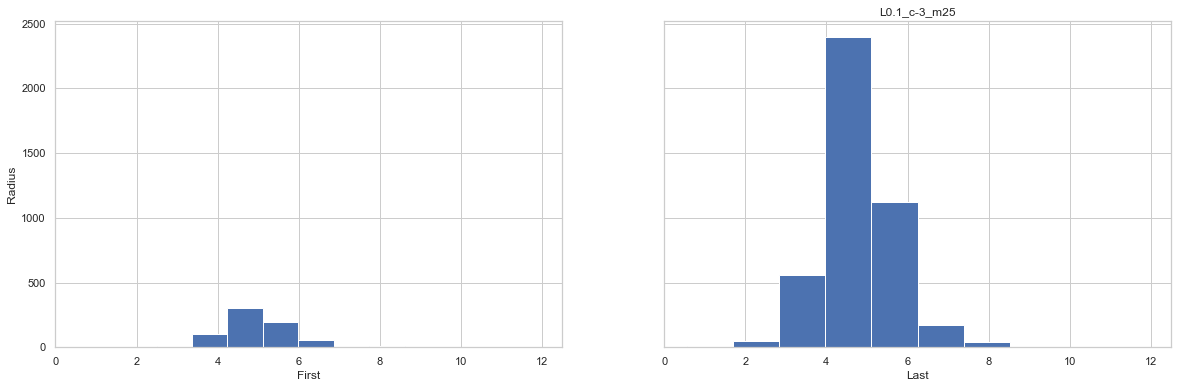

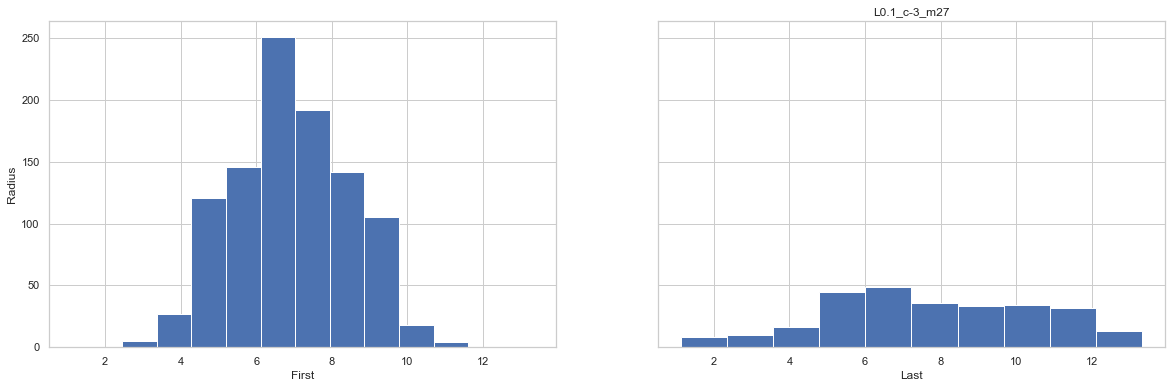

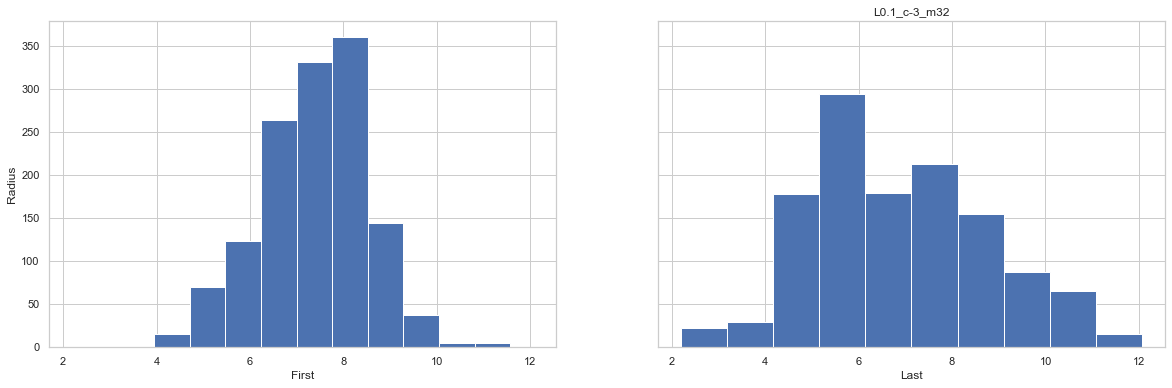

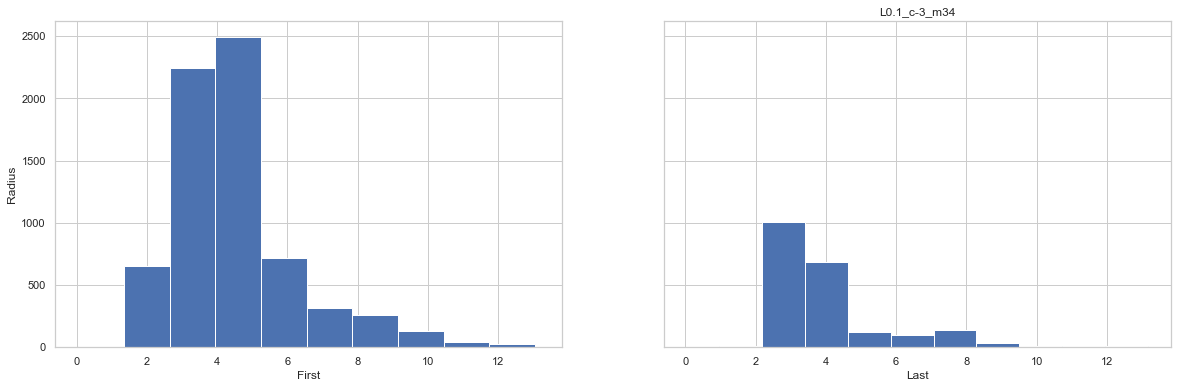

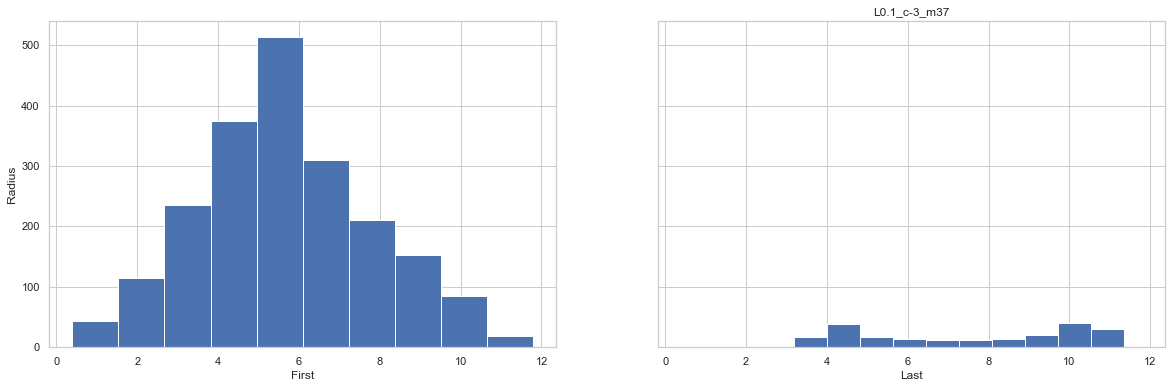

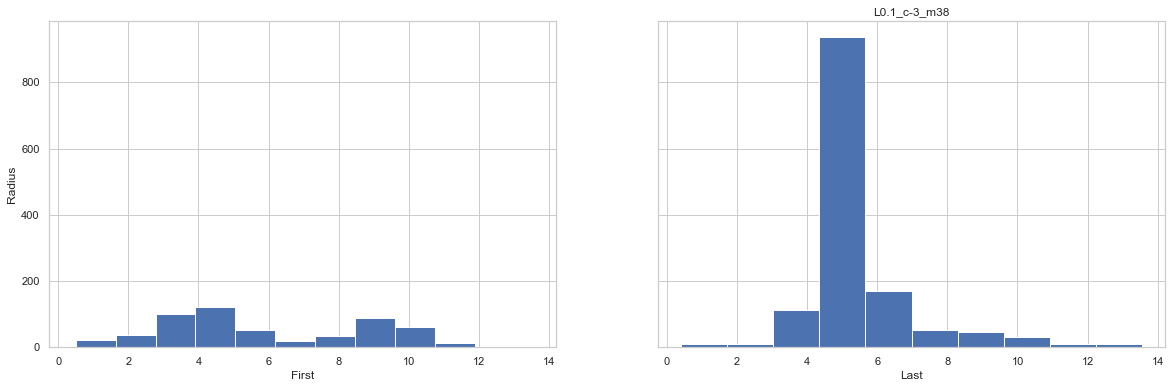

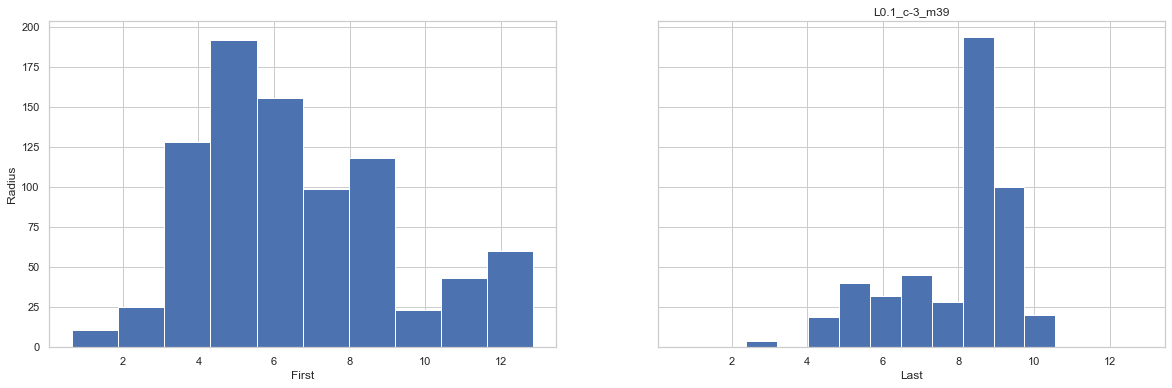

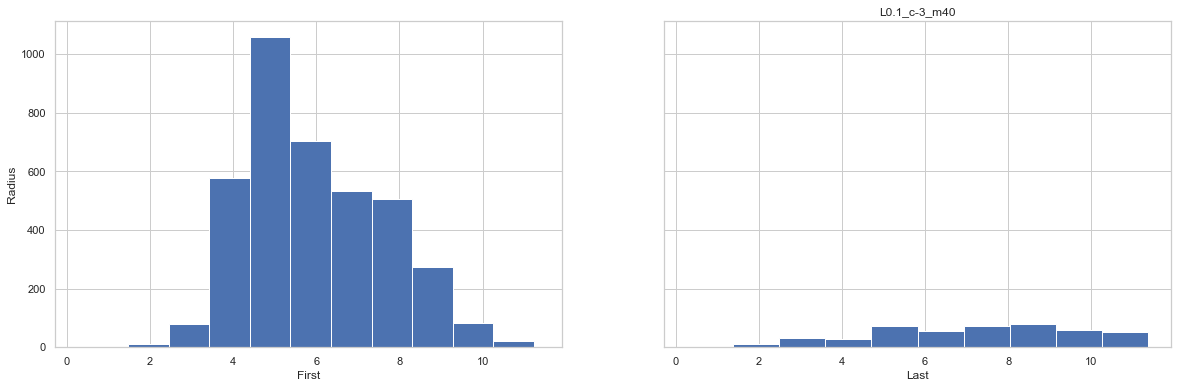

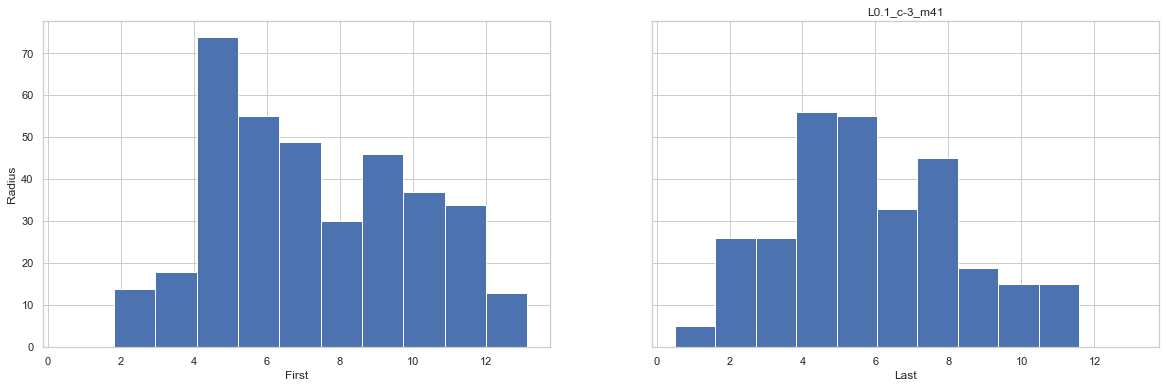

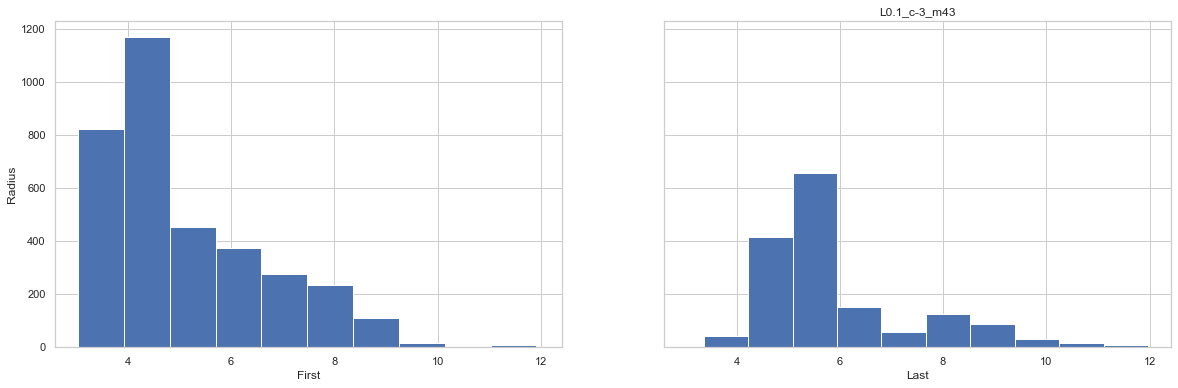

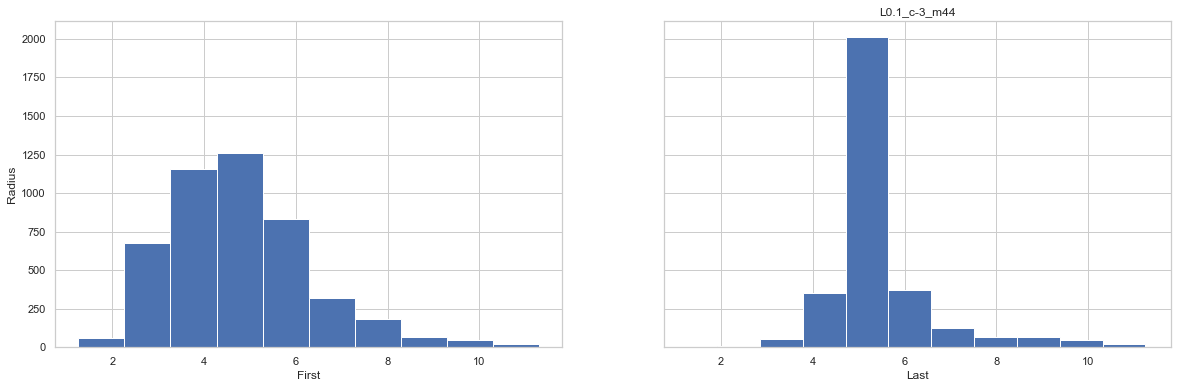

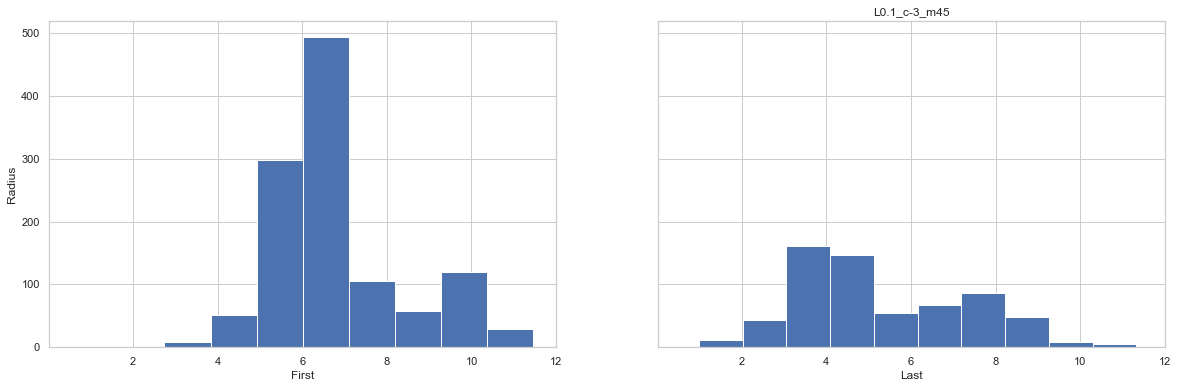

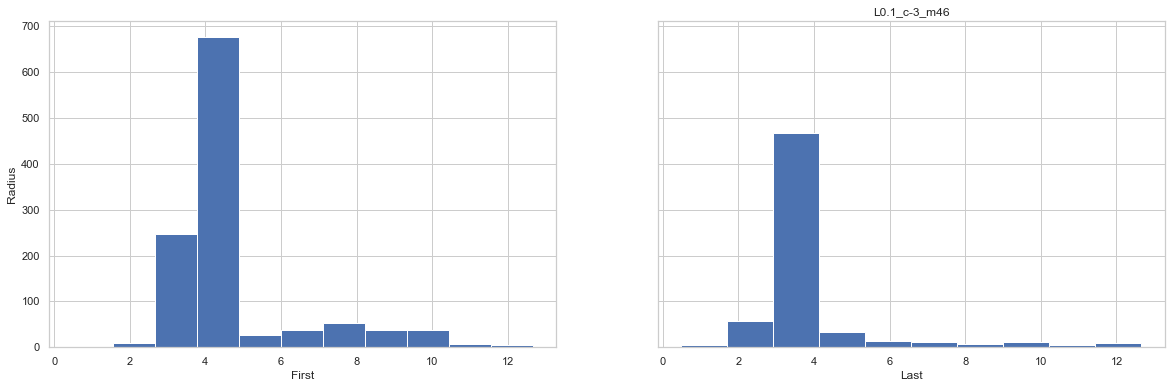

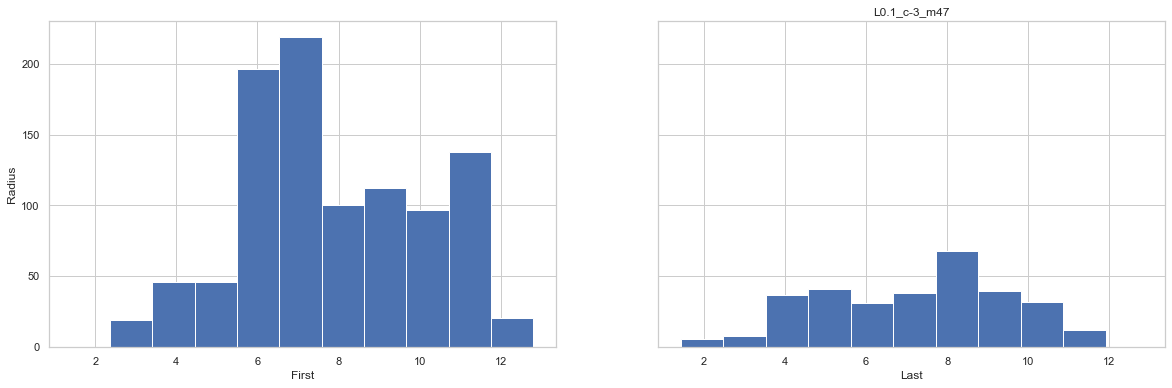

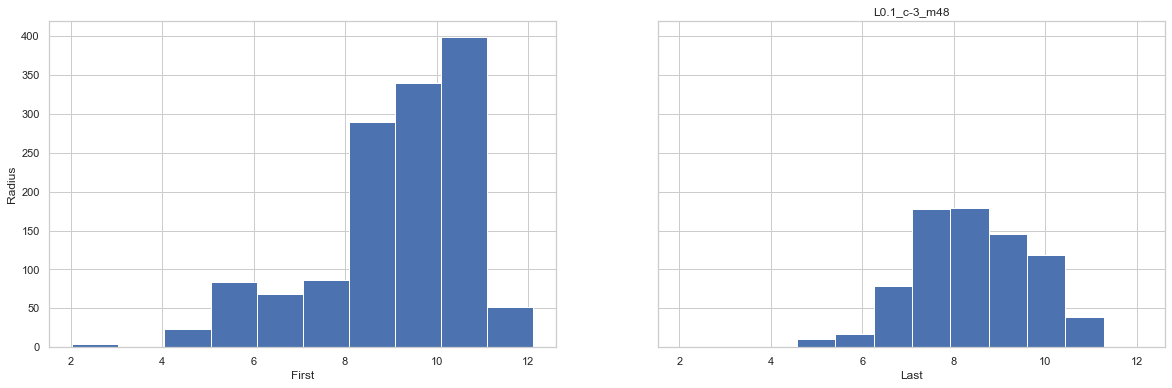

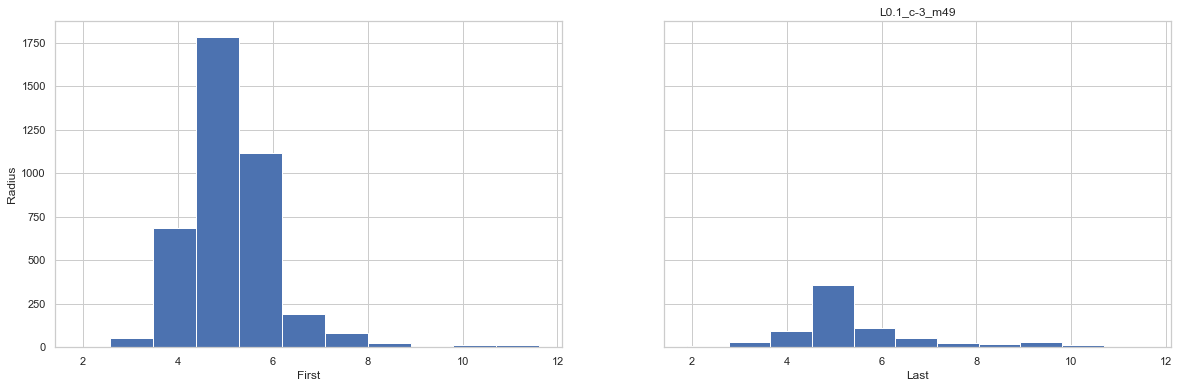

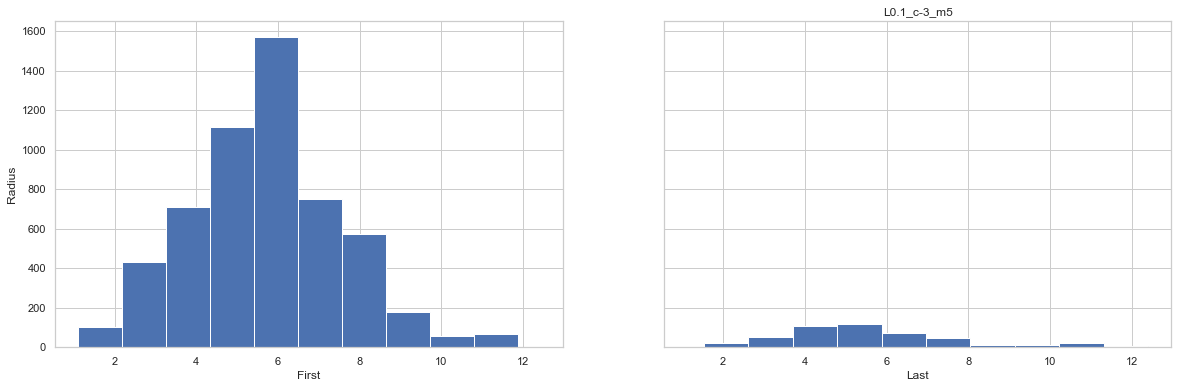

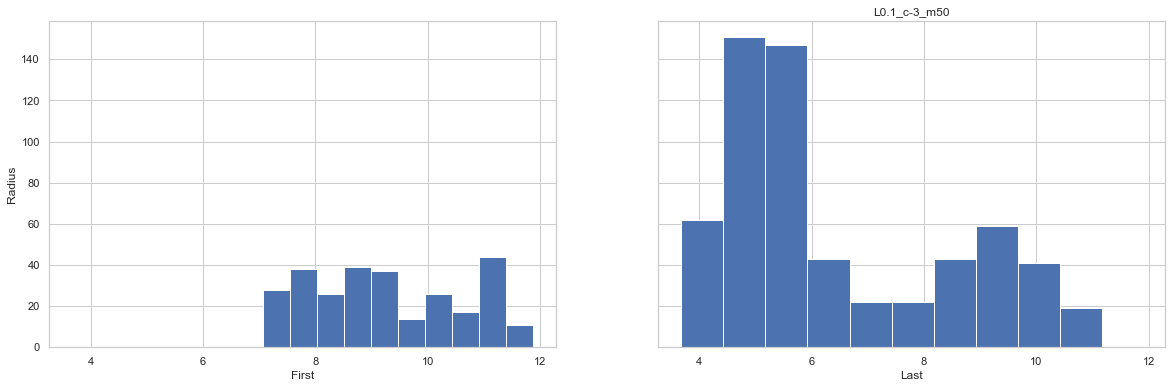

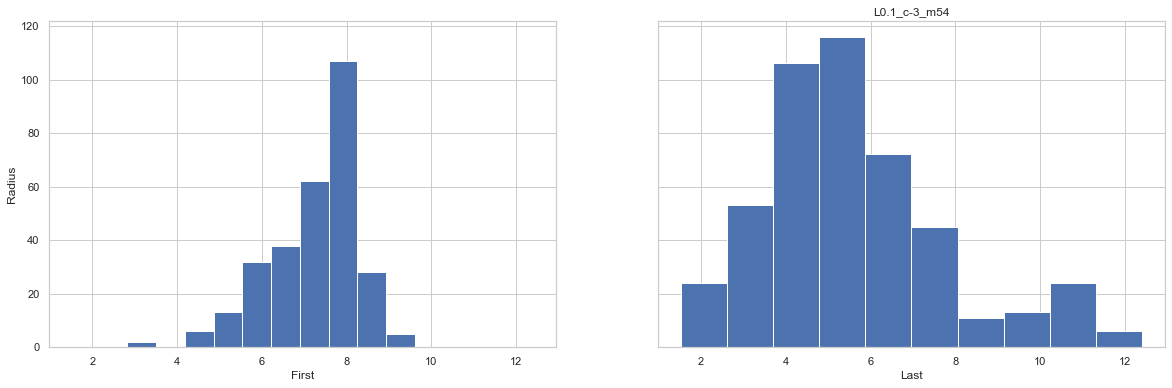

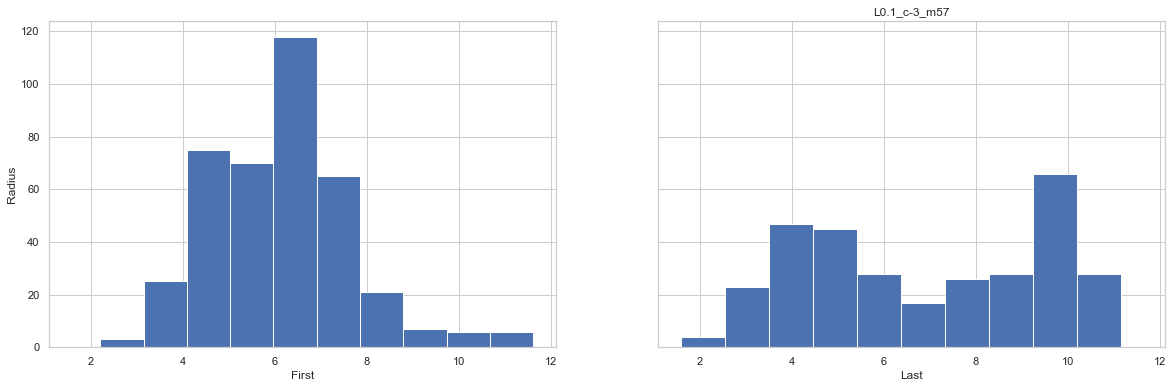

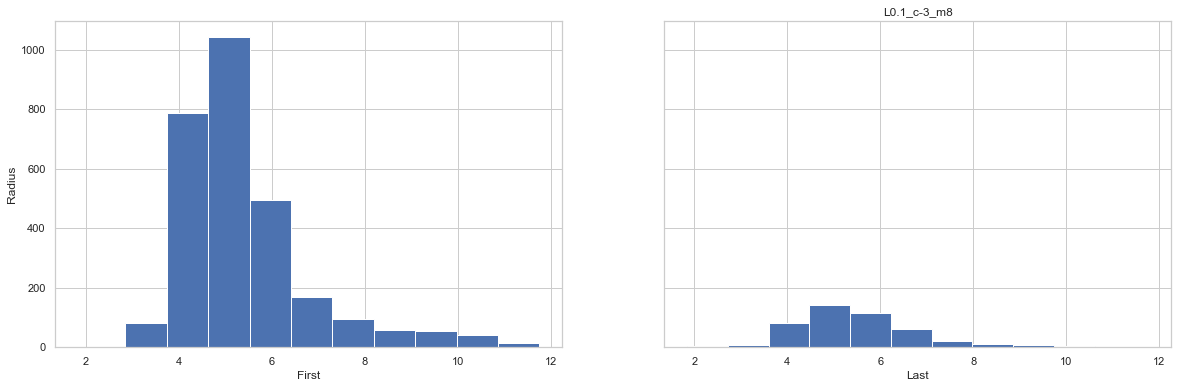

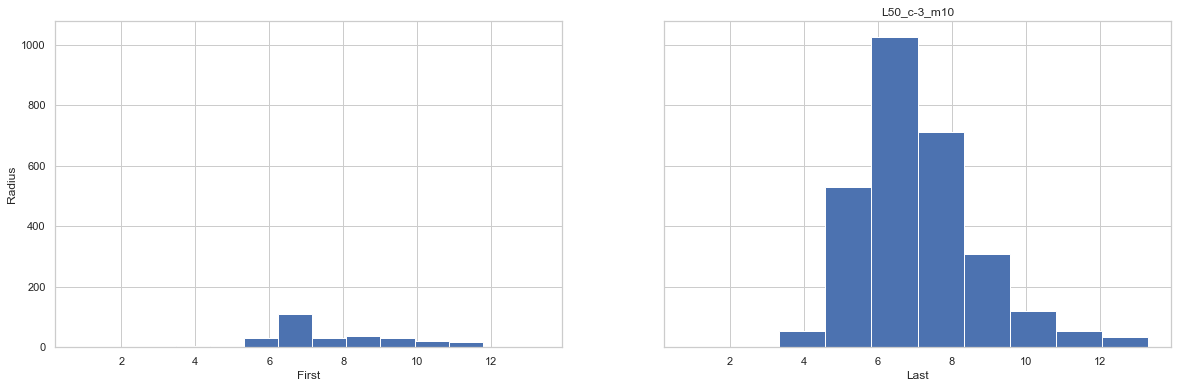

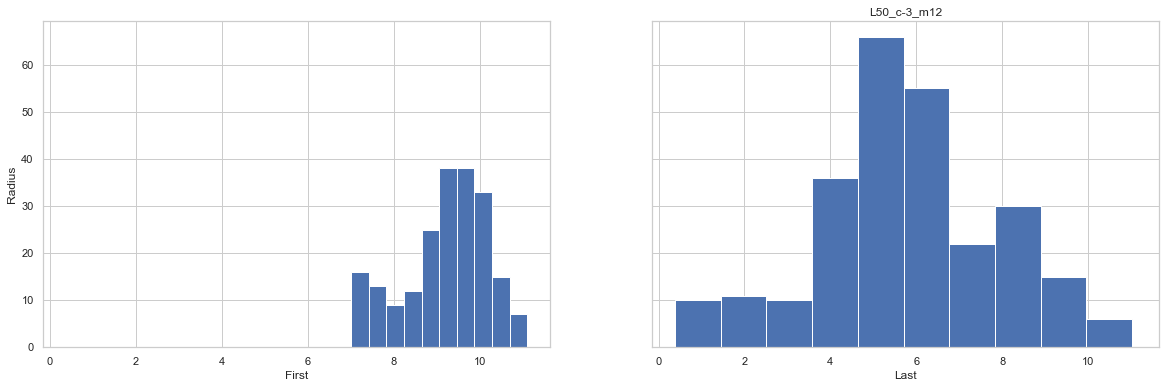

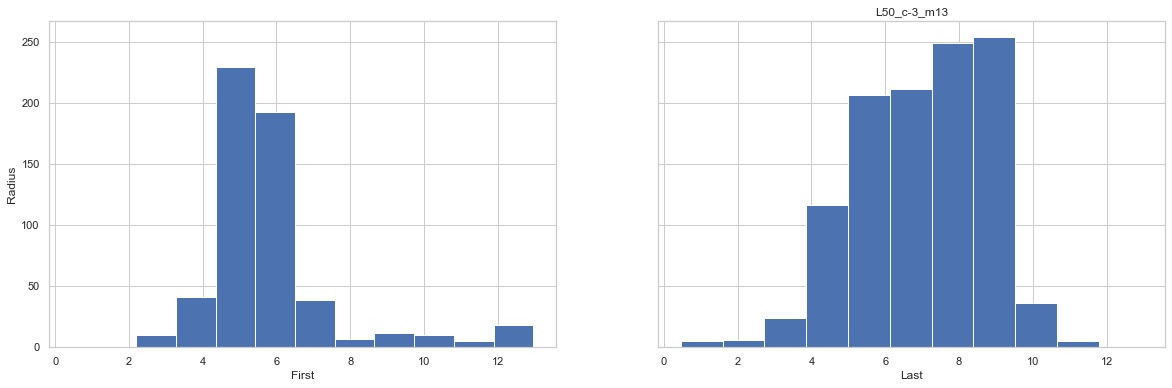

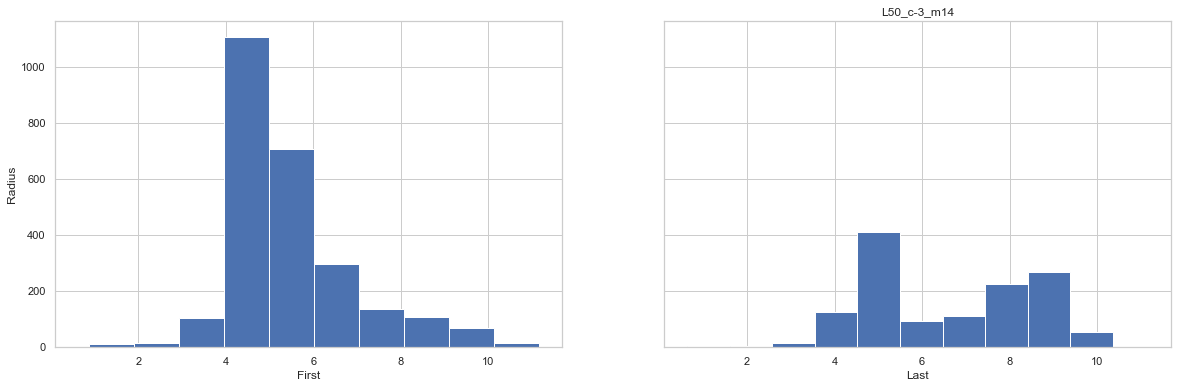

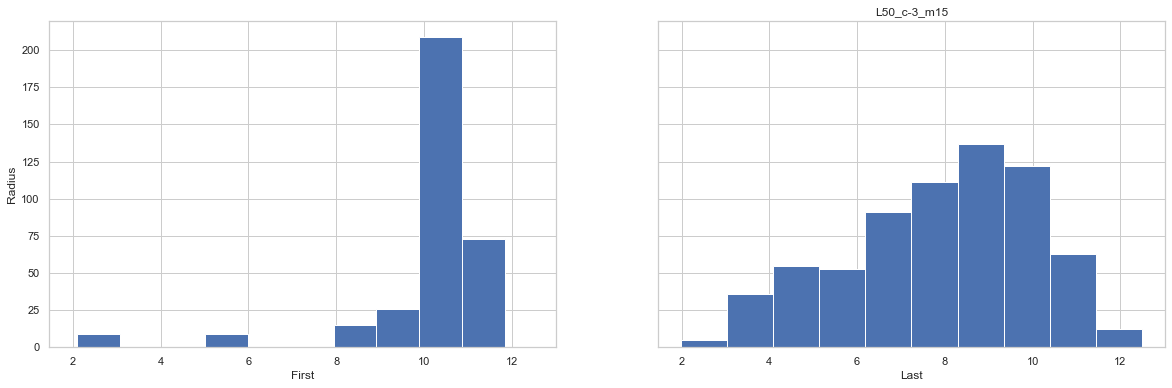

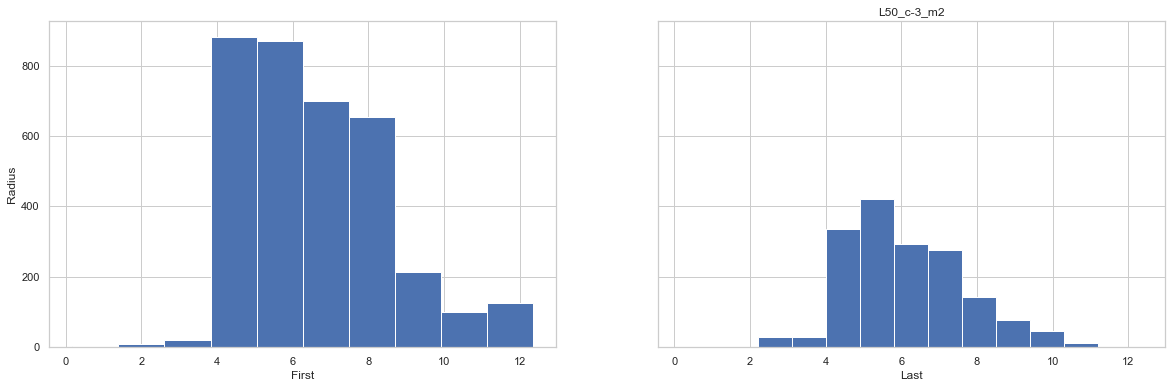

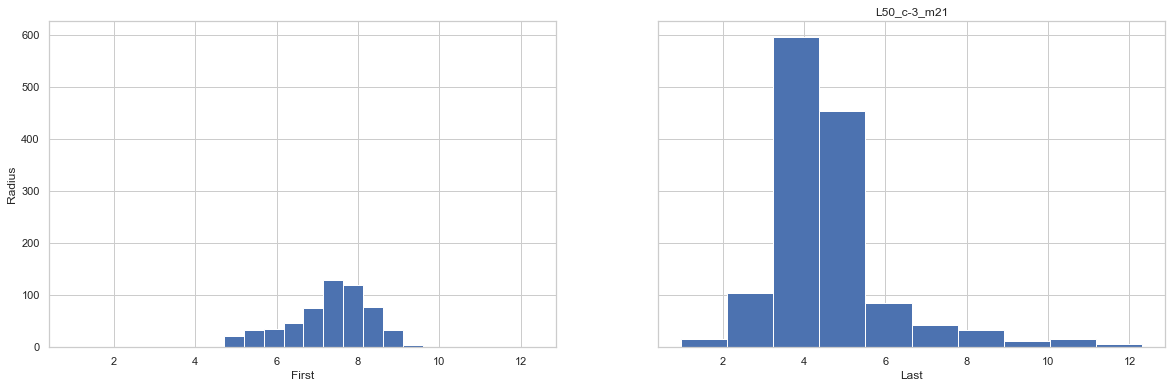

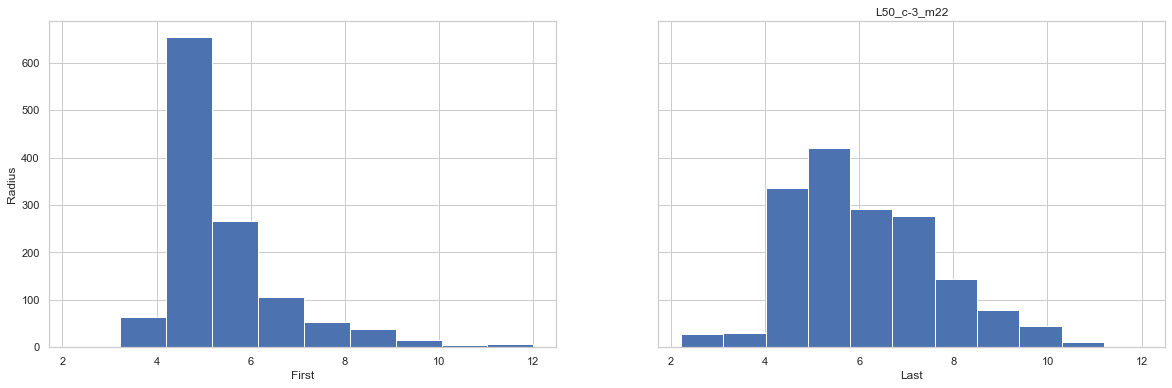

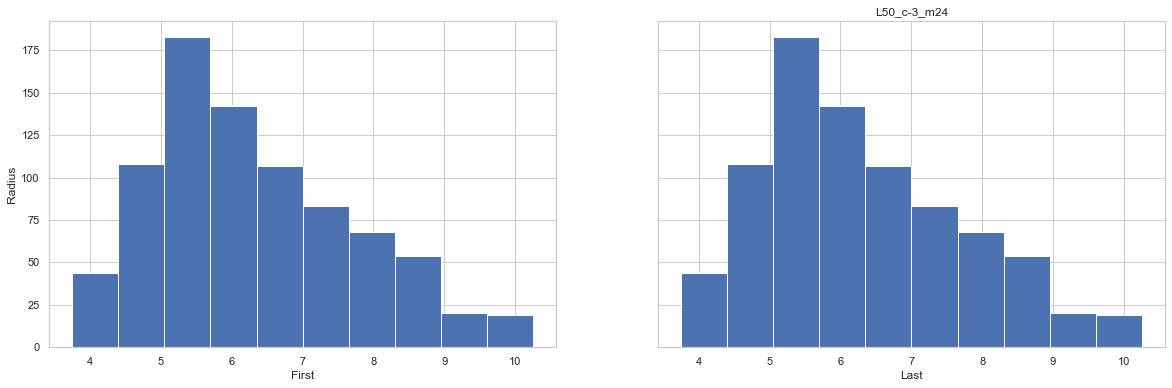

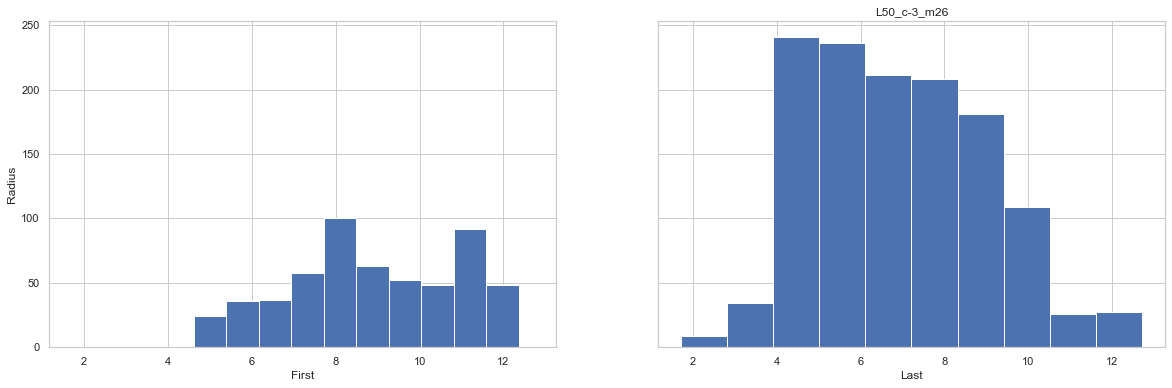

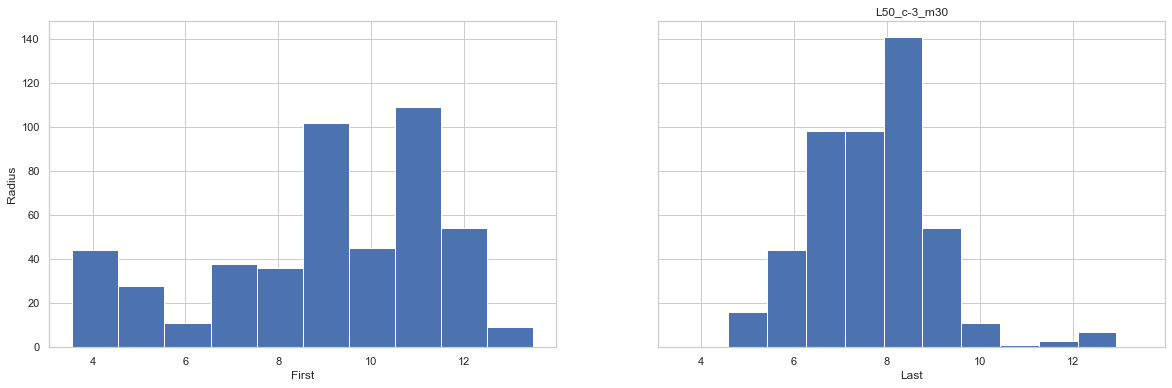

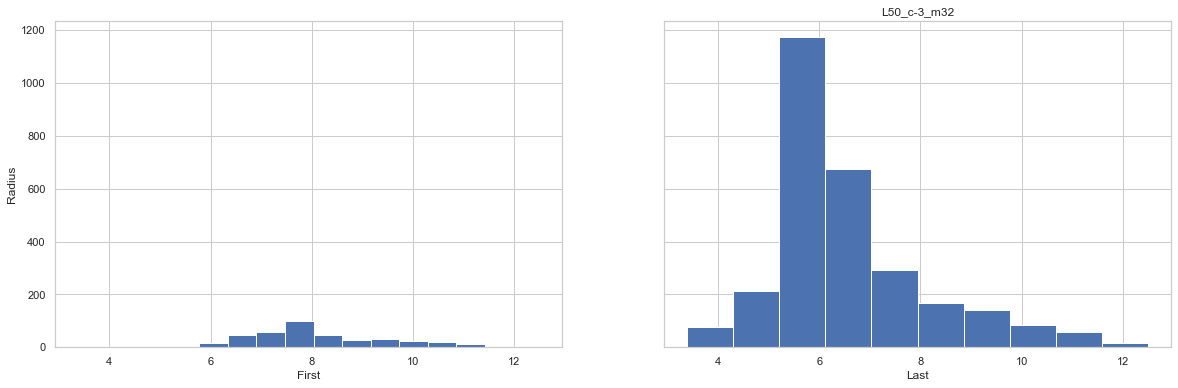

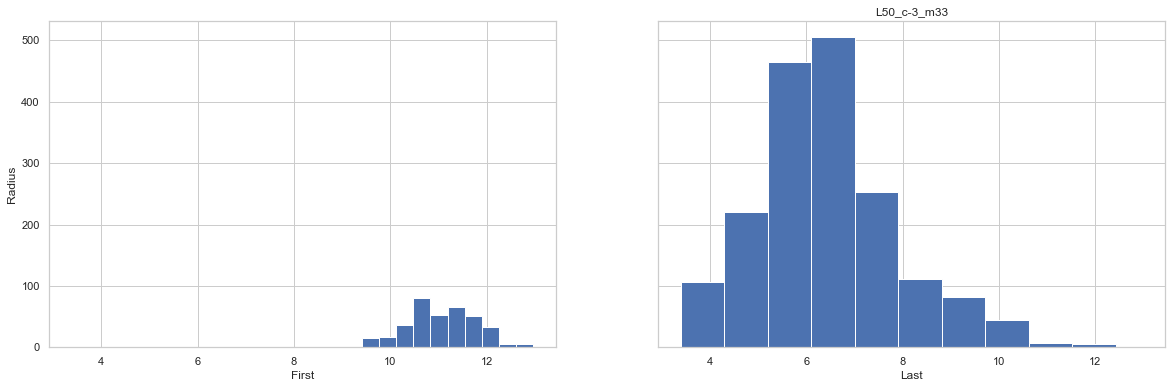

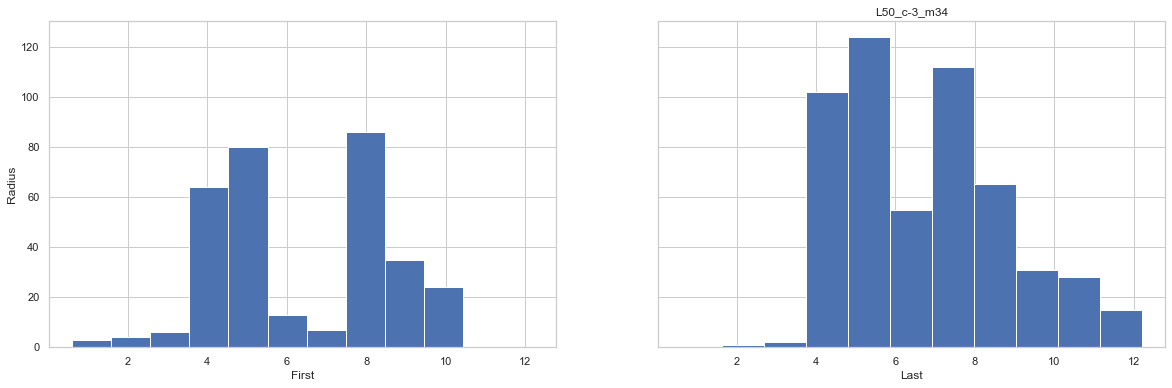

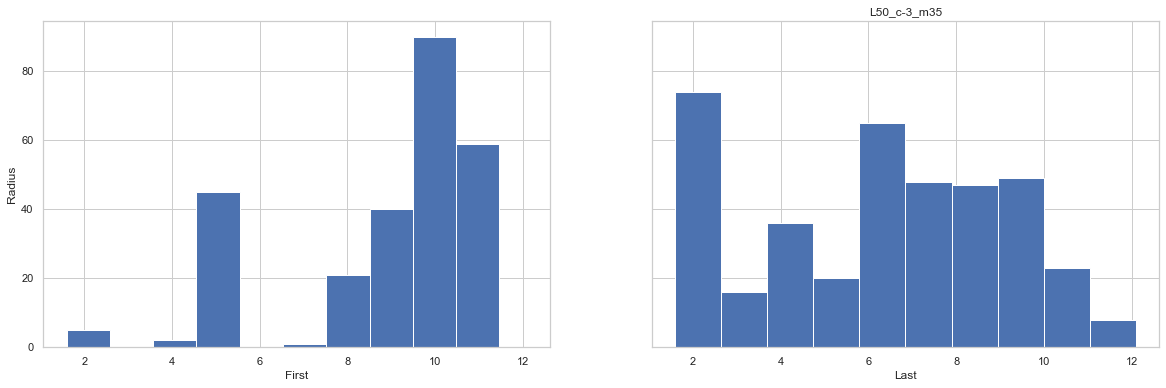

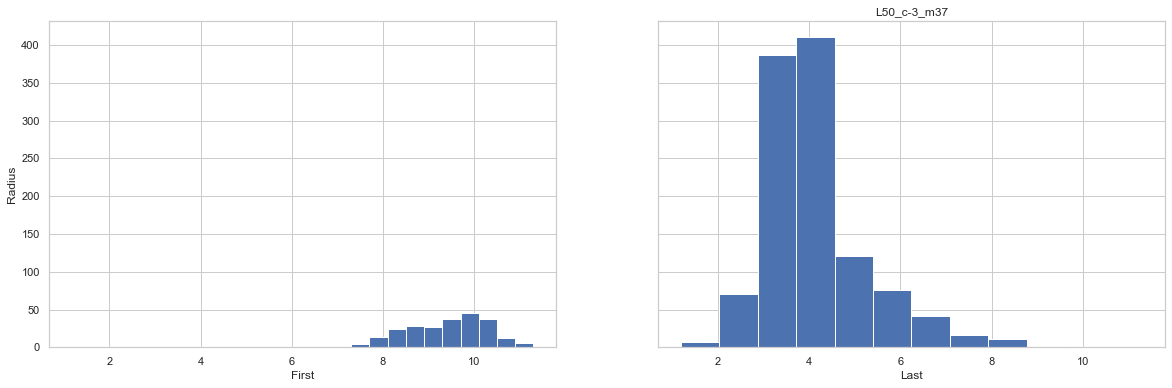

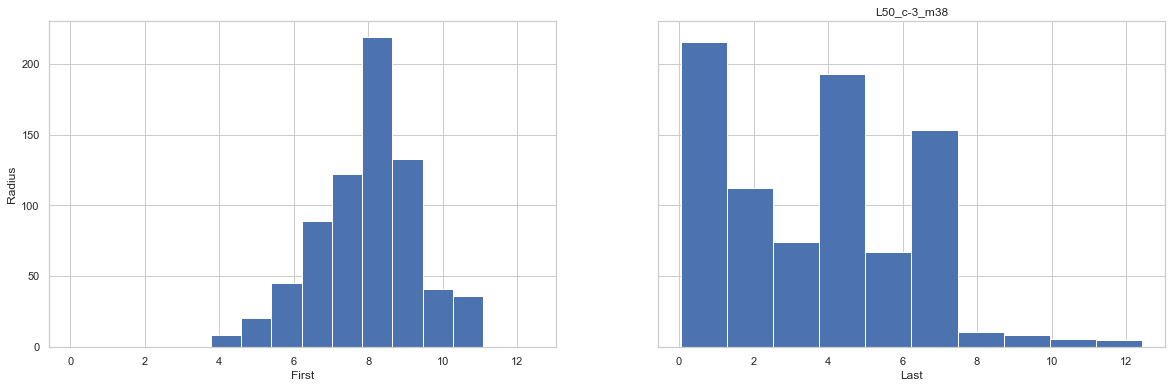

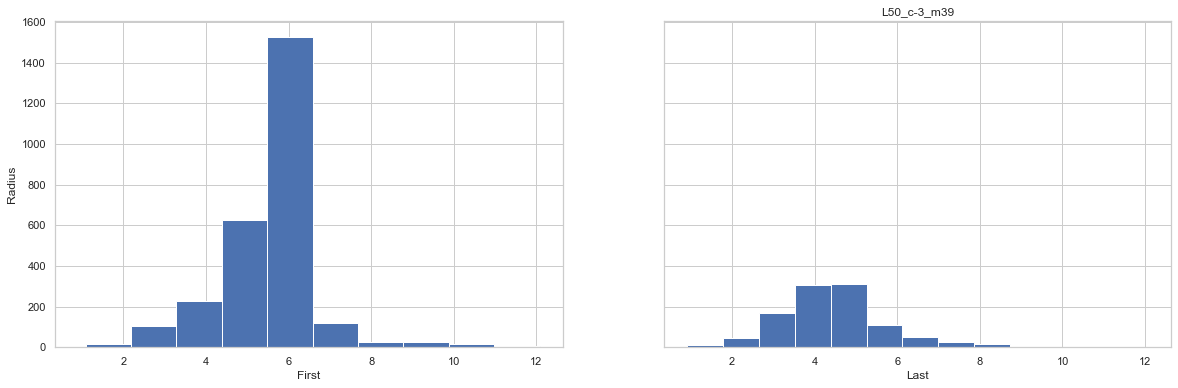

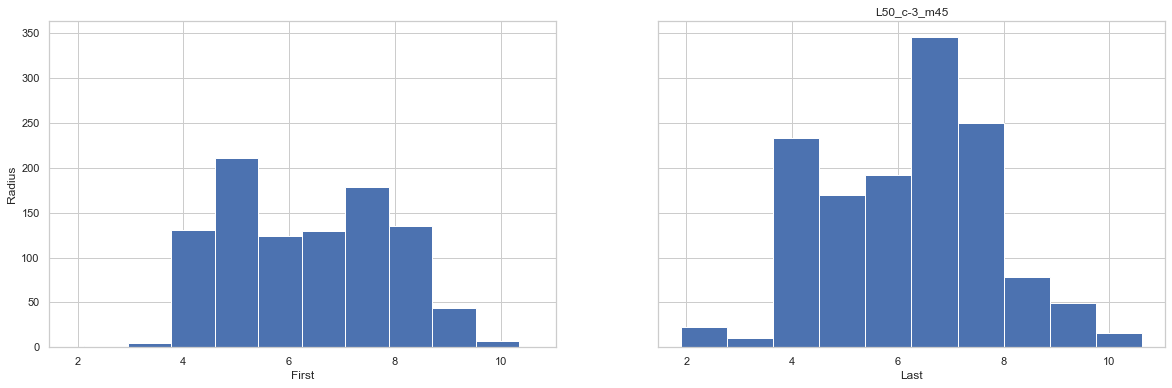

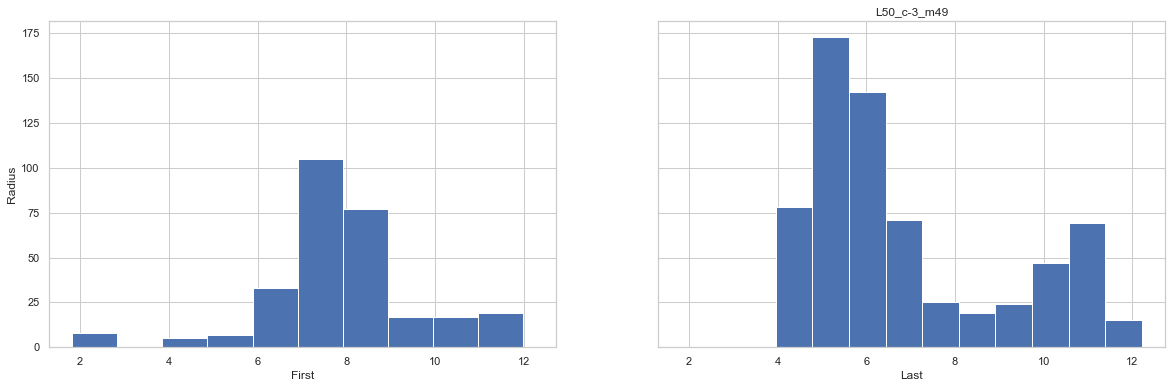

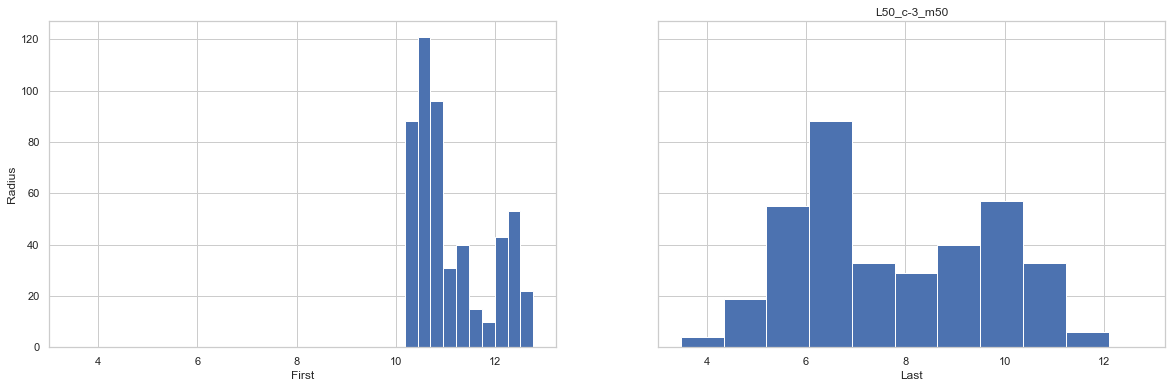

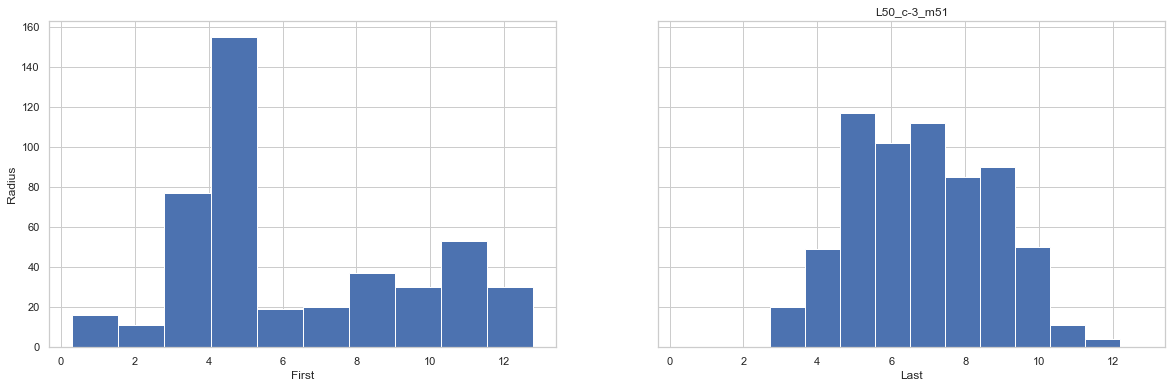

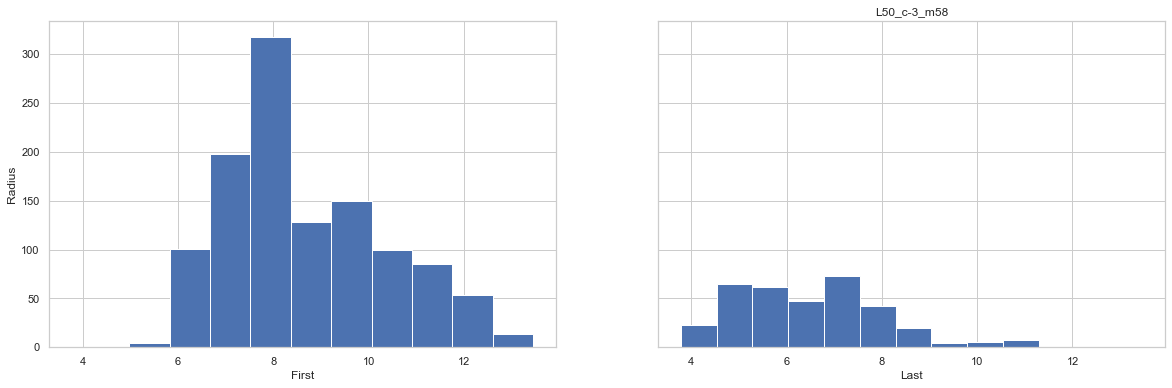

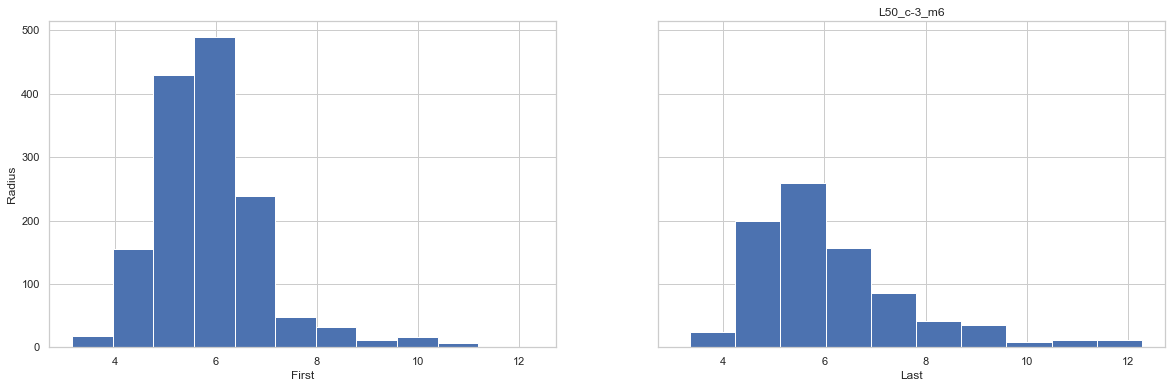

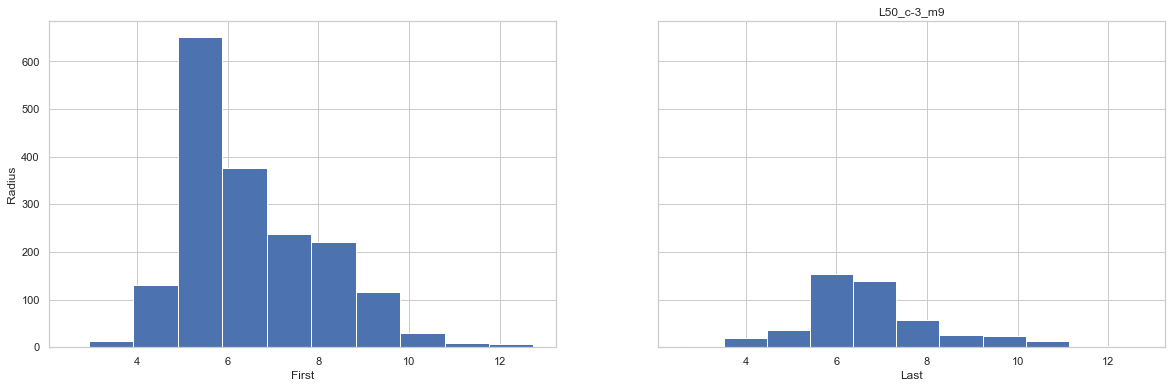

In [21]:
#plot in terms of r
for name in nam_51:
    rad_first_visit = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('first'))].Radial_Length
    rad_last_visit = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('last'))].Radial_Length
    
#     if len(list(rad_first_visit)) > 0:
    if any(list(~np.isnan(rad_first_visit))) == True & any(list(~np.isnan(rad_last_visit))) == True:
        fig, ax = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (20,6), )
        ax[0].hist(rad_first_visit)
        ax[0].set_ylabel("Radius")
        ax[0].set_xlabel("First")
        ax[1].hist(rad_last_visit)
        ax[1].set_title(name)
        ax[1].set_xlabel("Last")
        plt.savefig(out_path + "\\Kinematics\Radial\\" + name + ".png")
    else:
        print(name)

C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


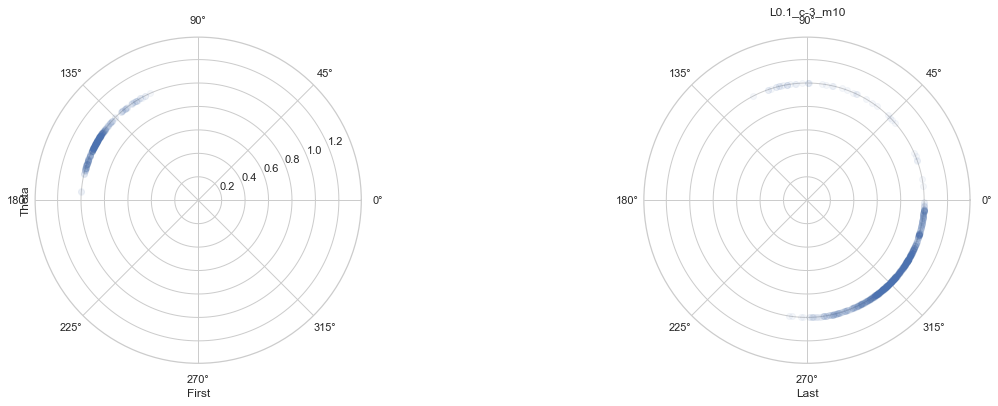

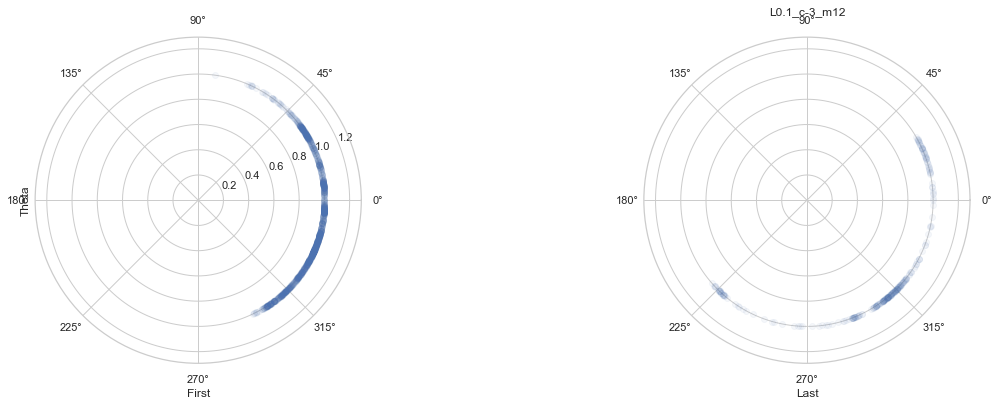

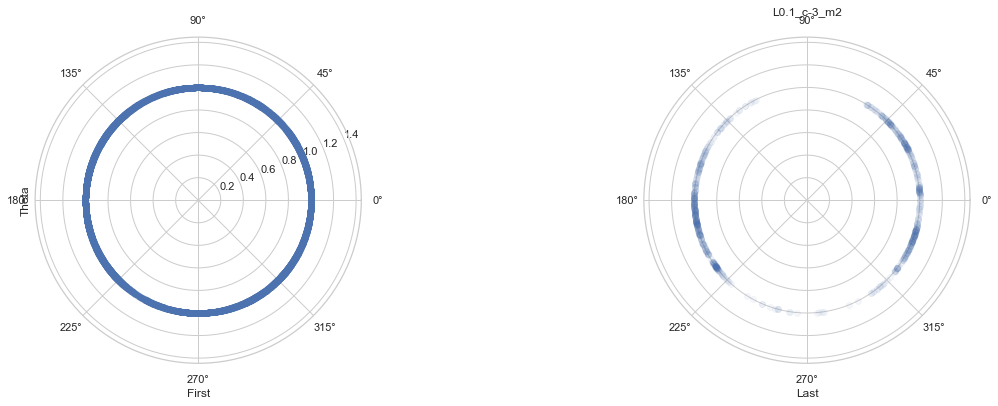

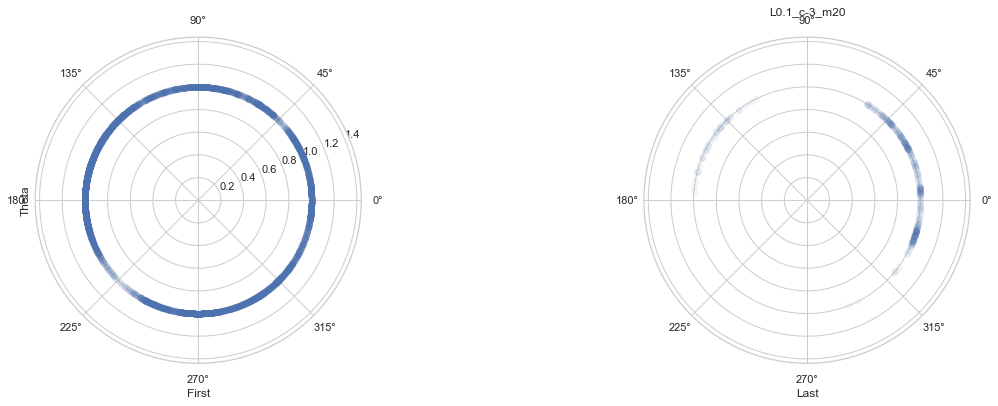

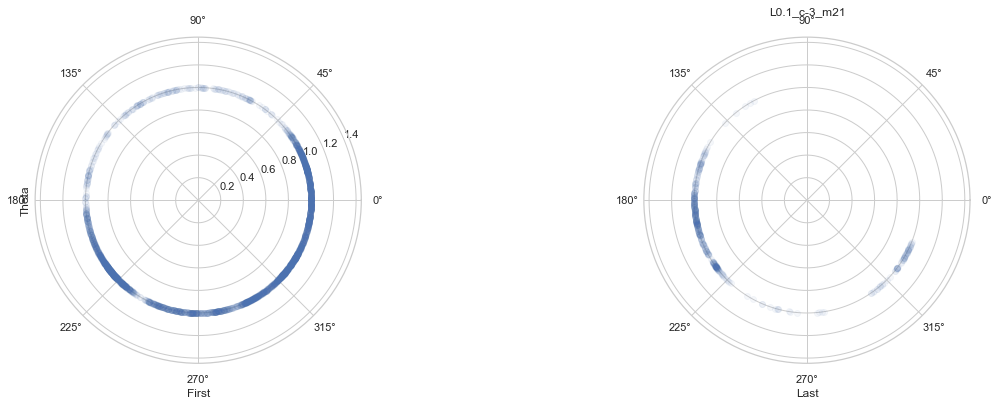

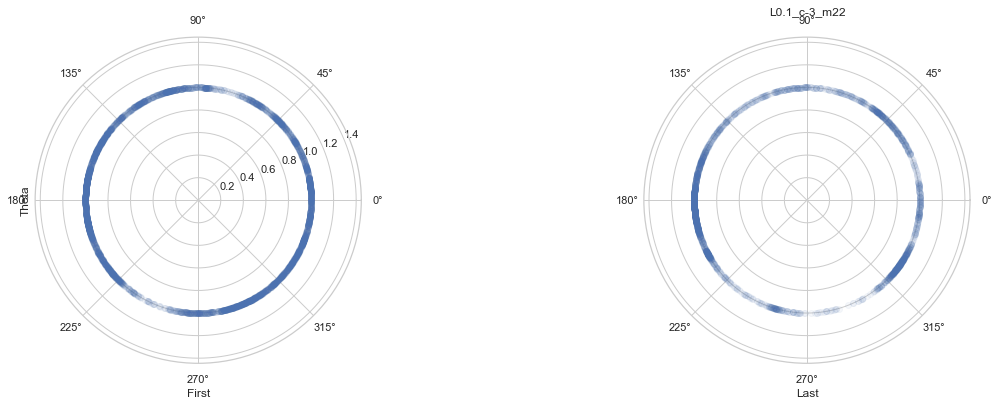

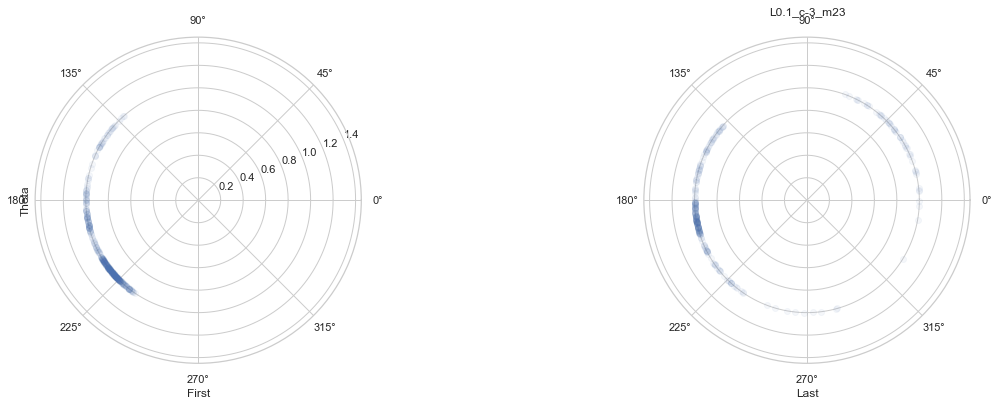

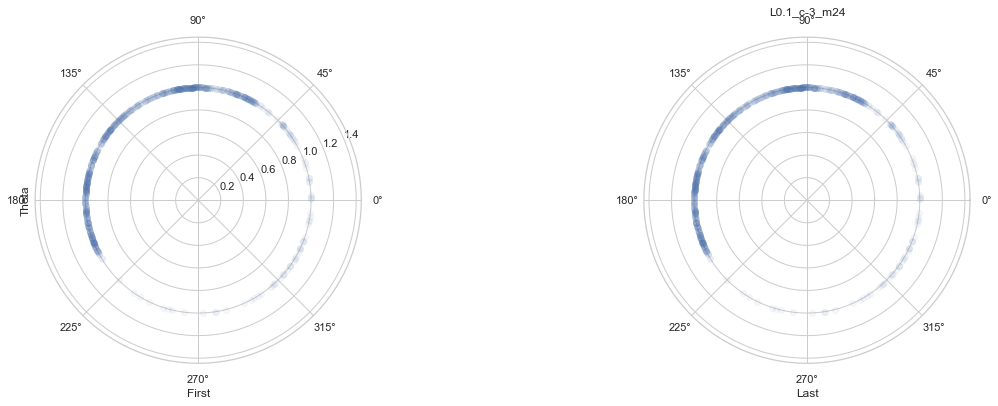

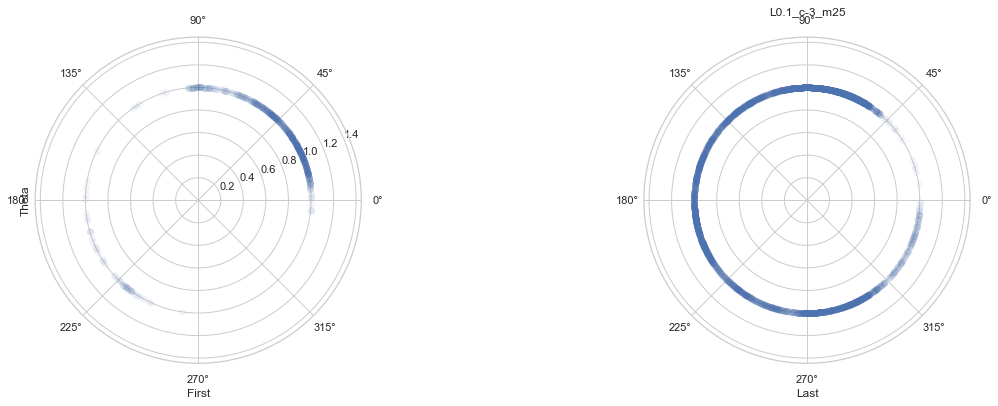

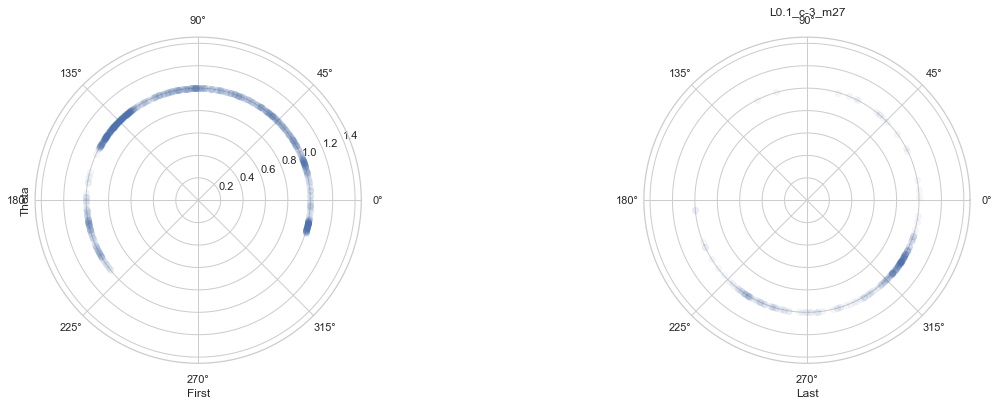

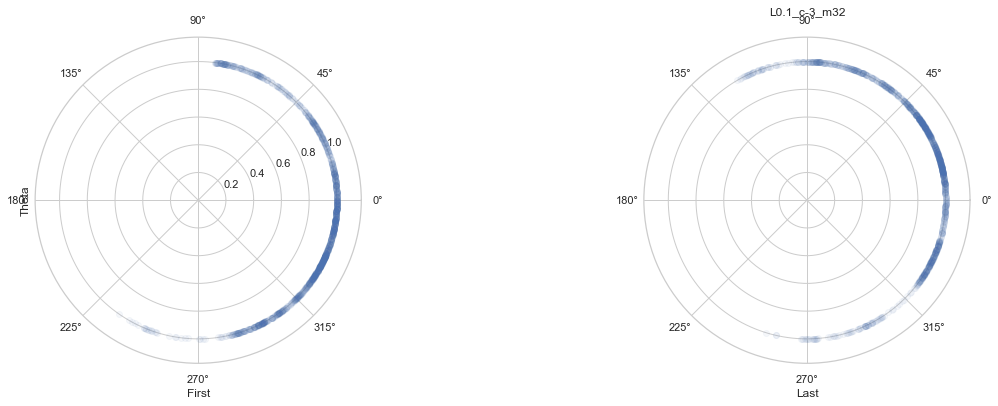

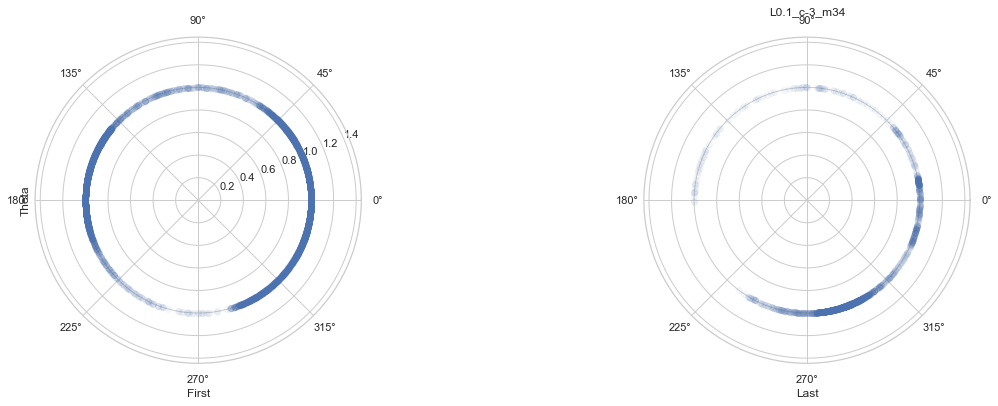

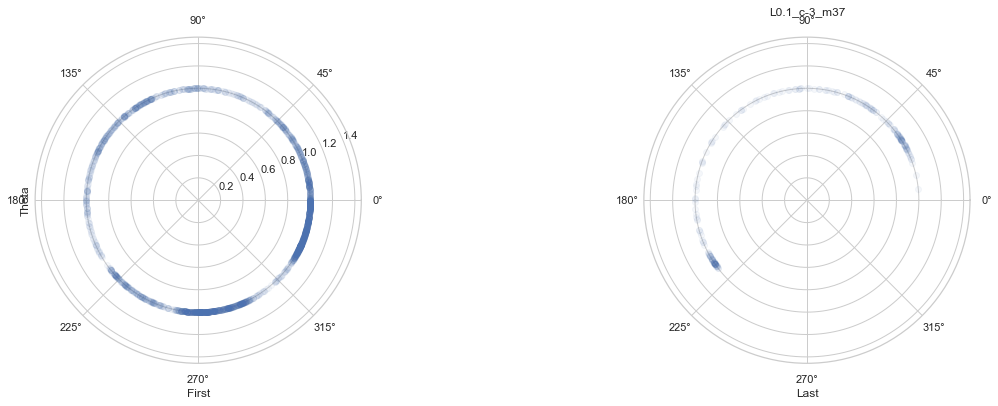

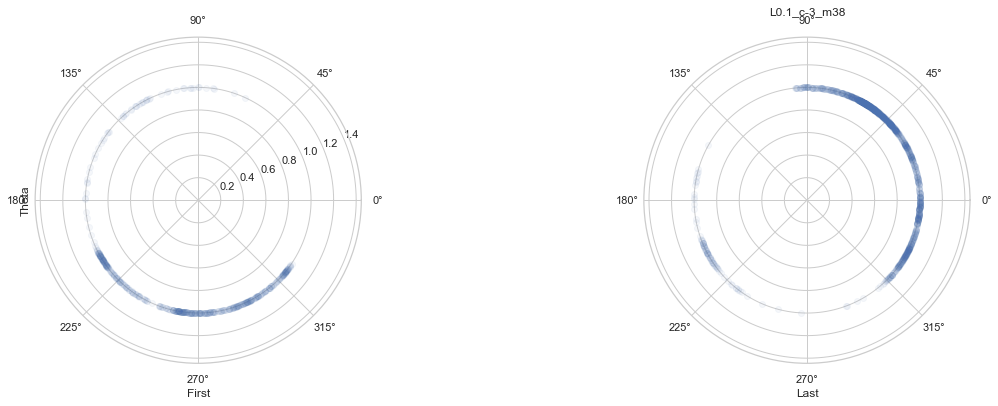

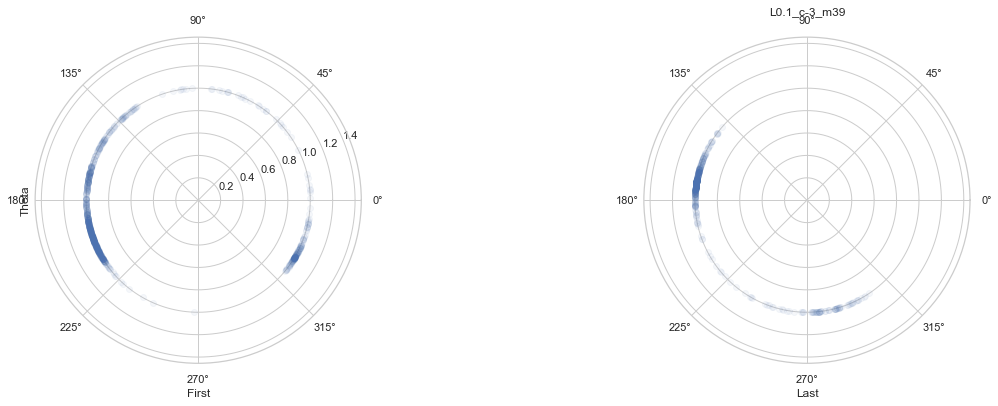

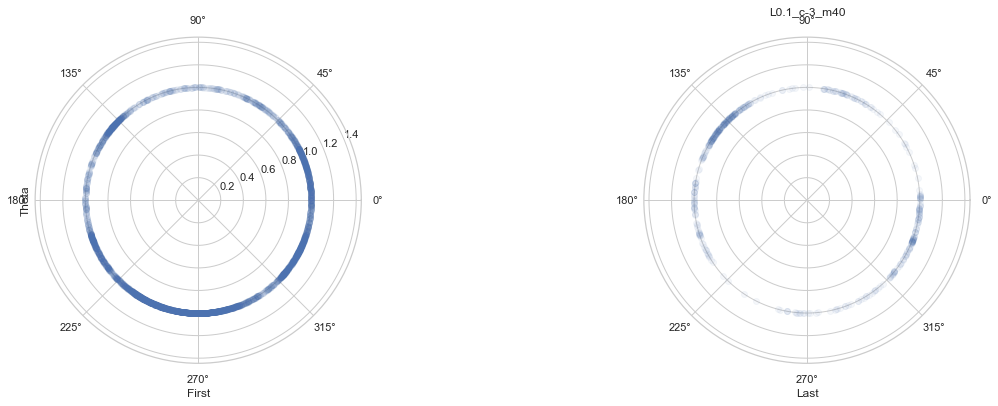

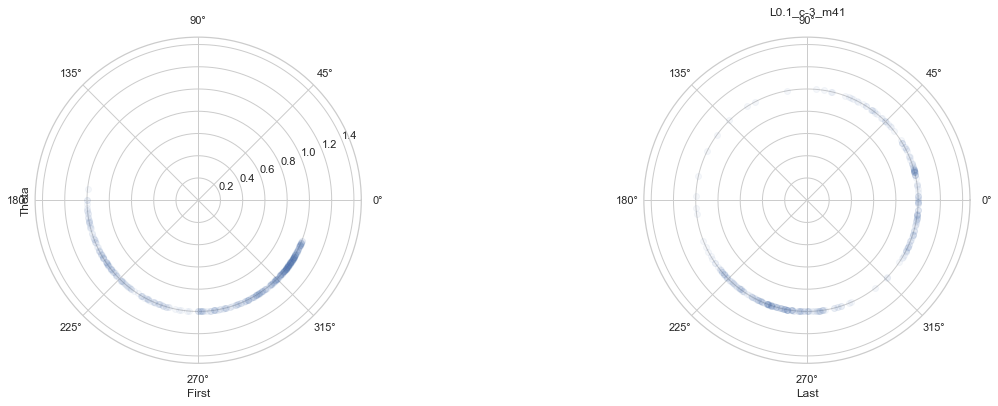

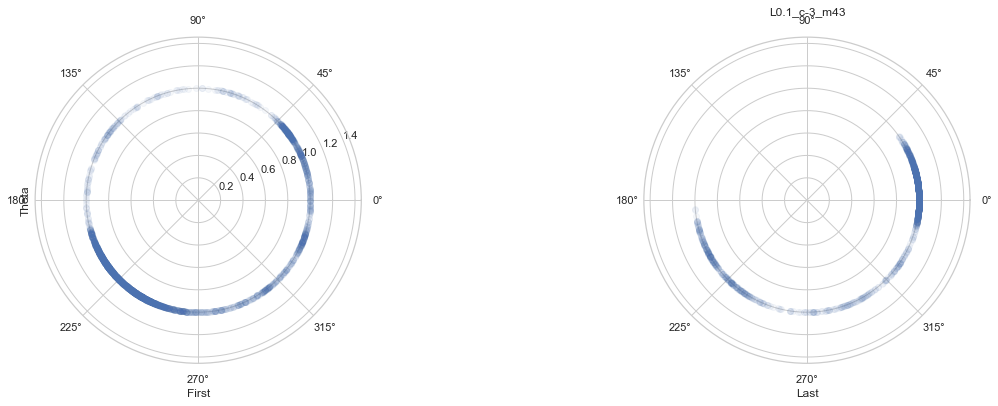

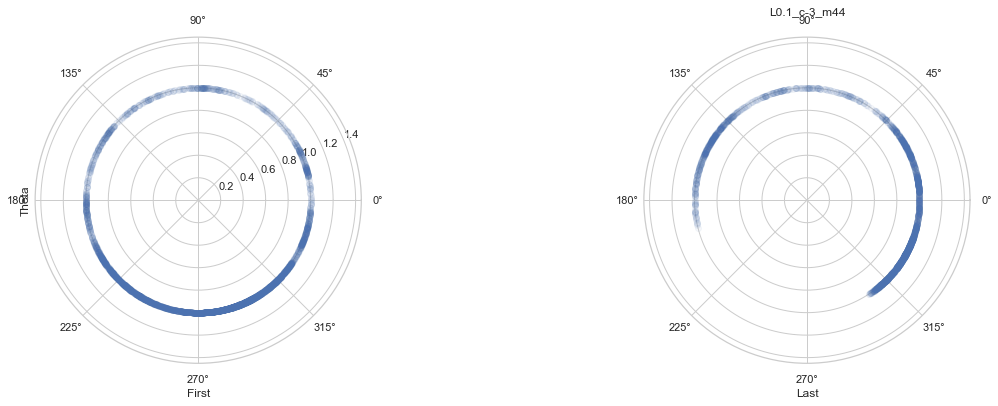

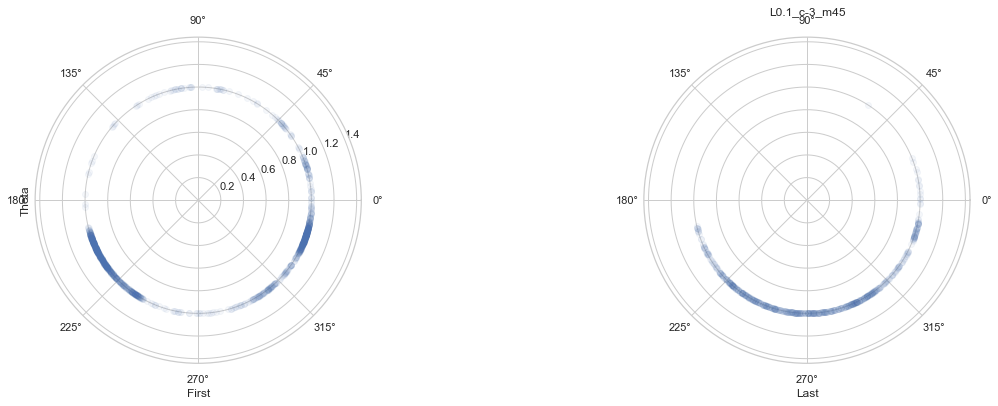

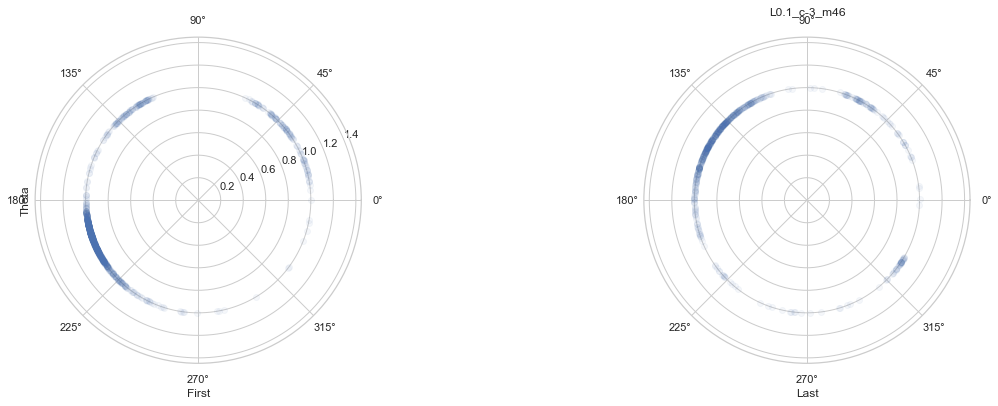

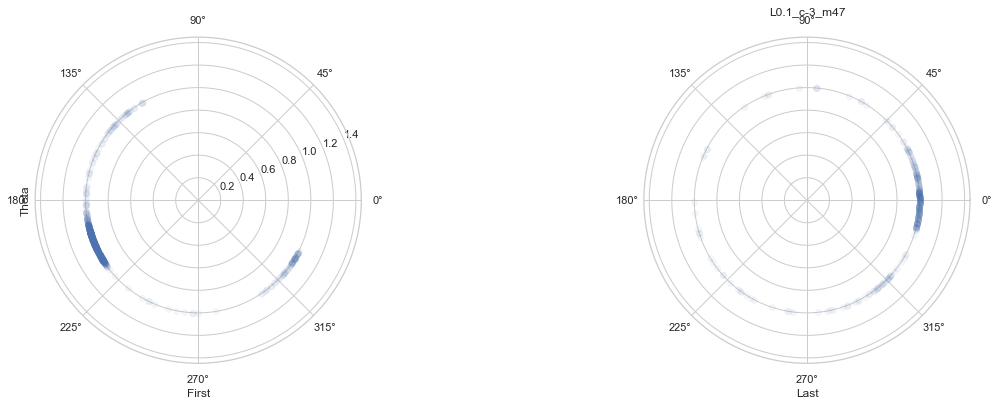

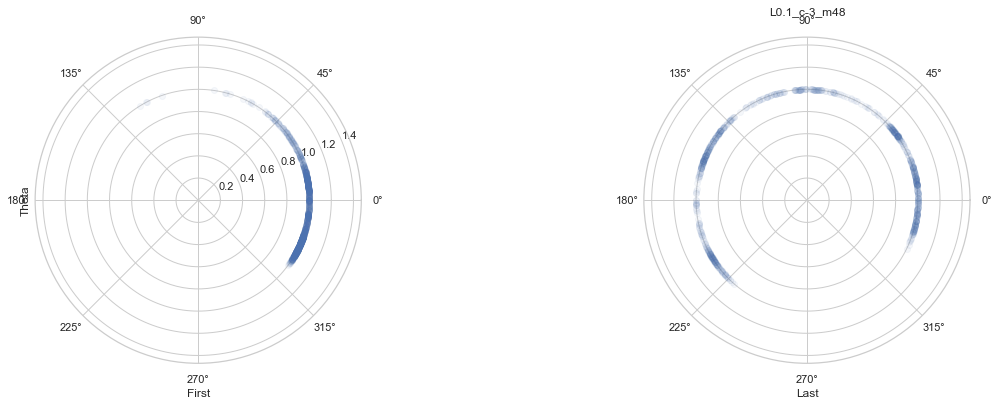

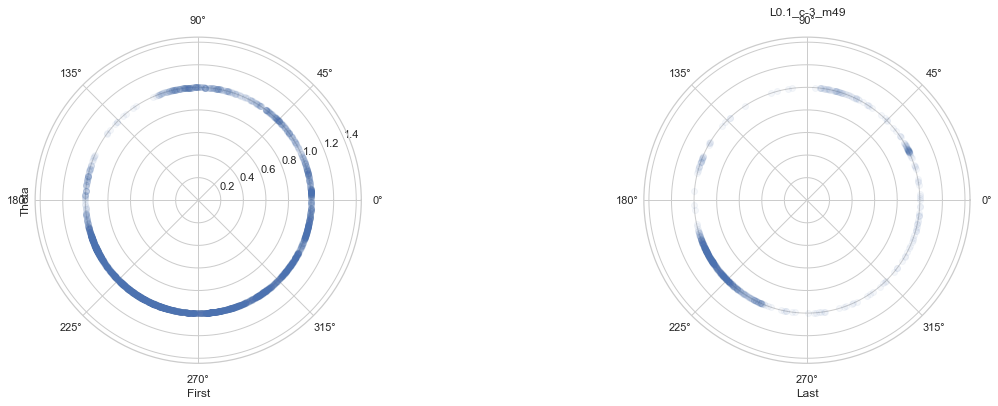

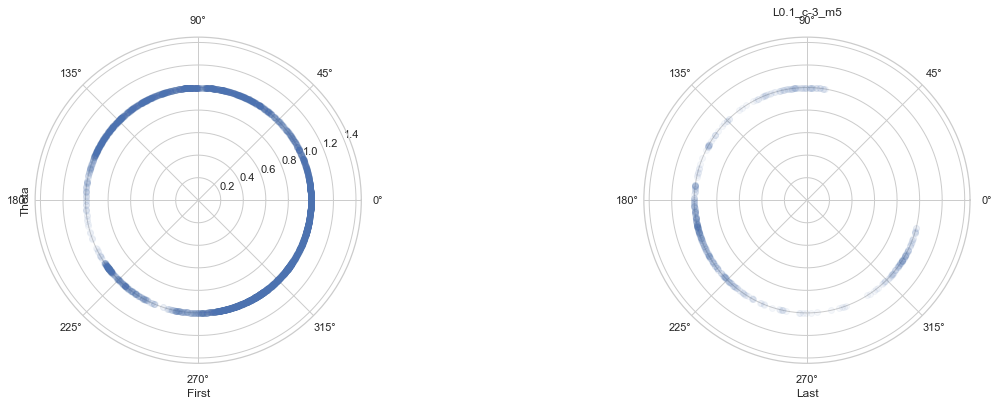

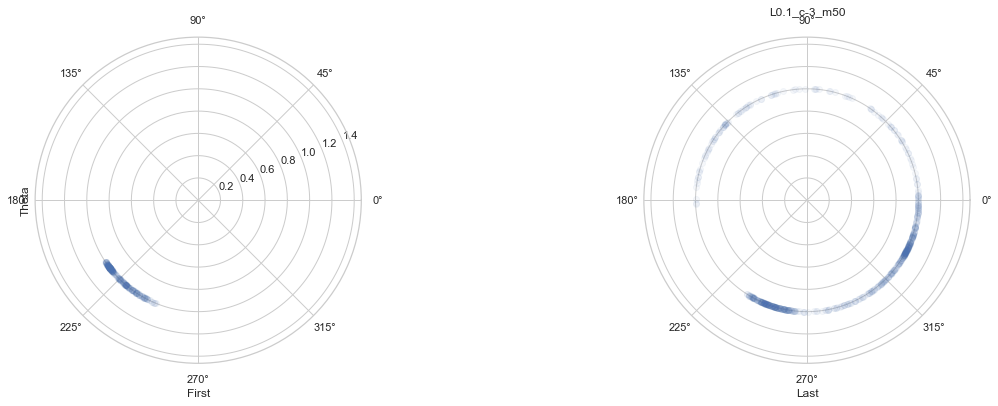

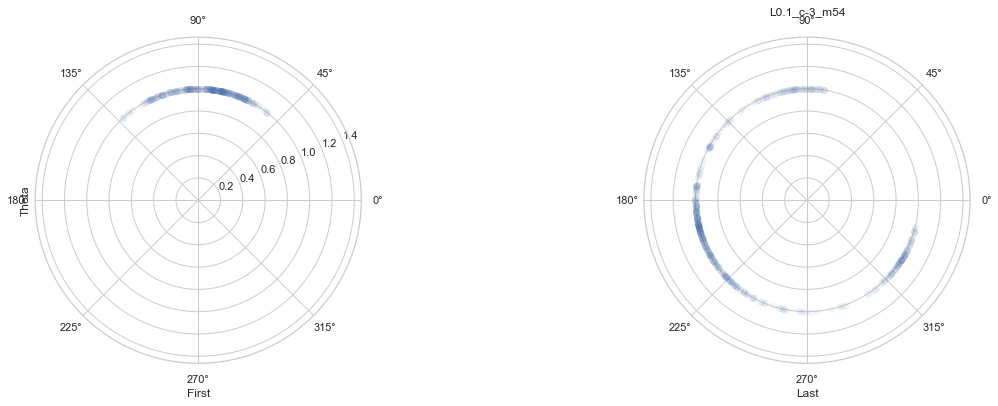

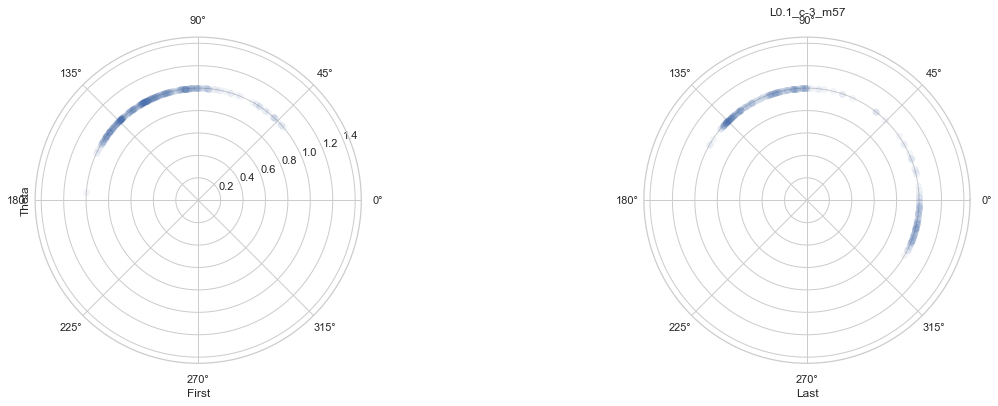

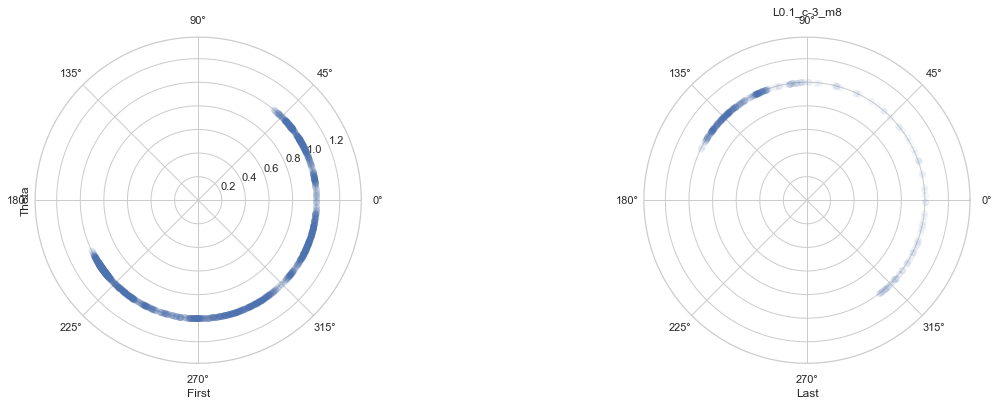

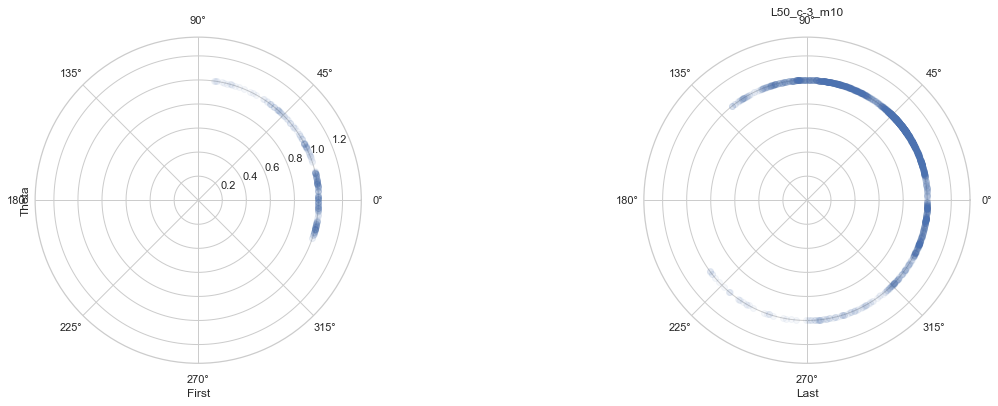

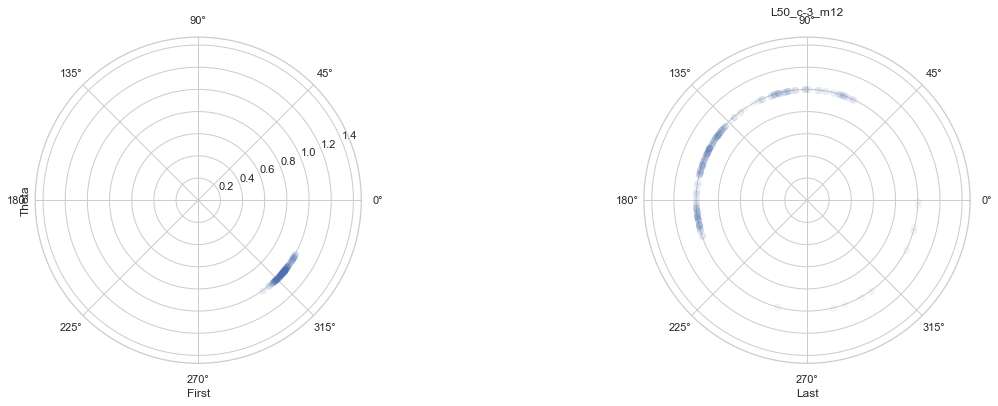

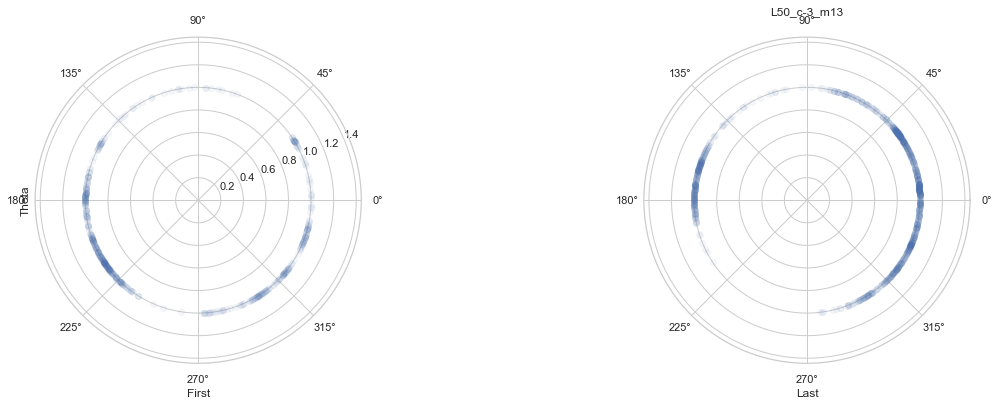

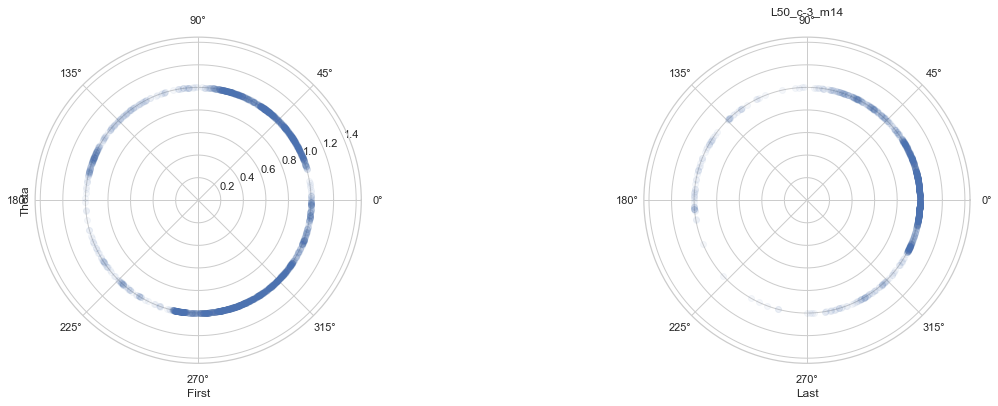

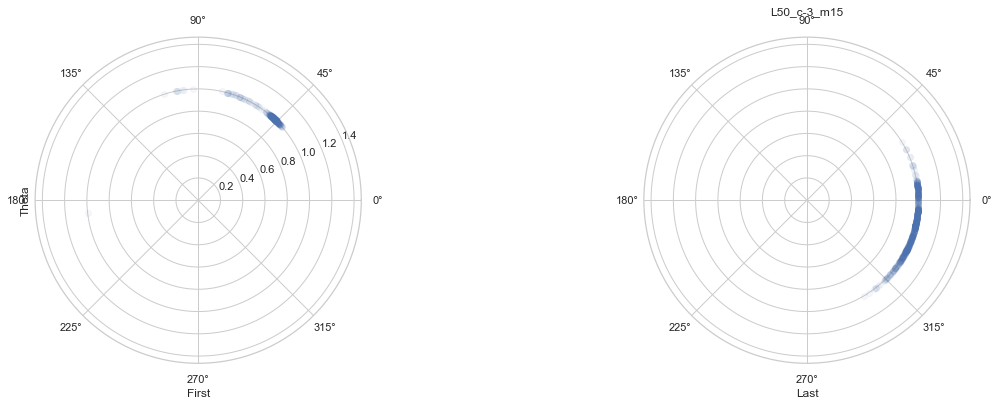

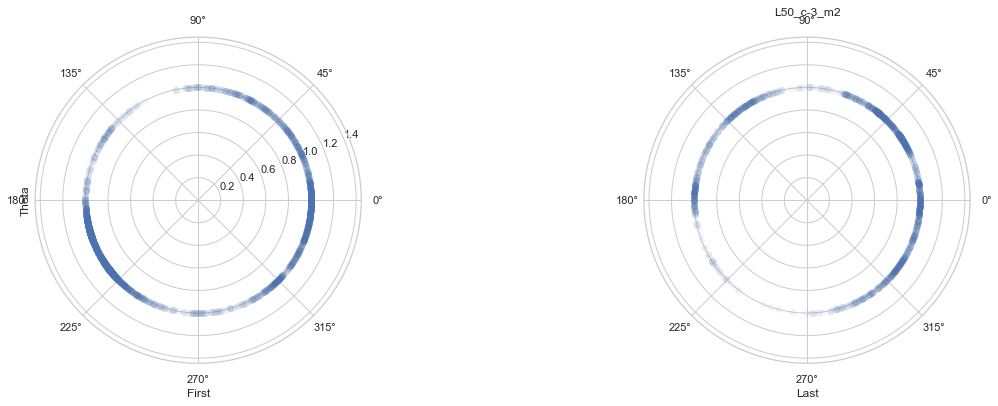

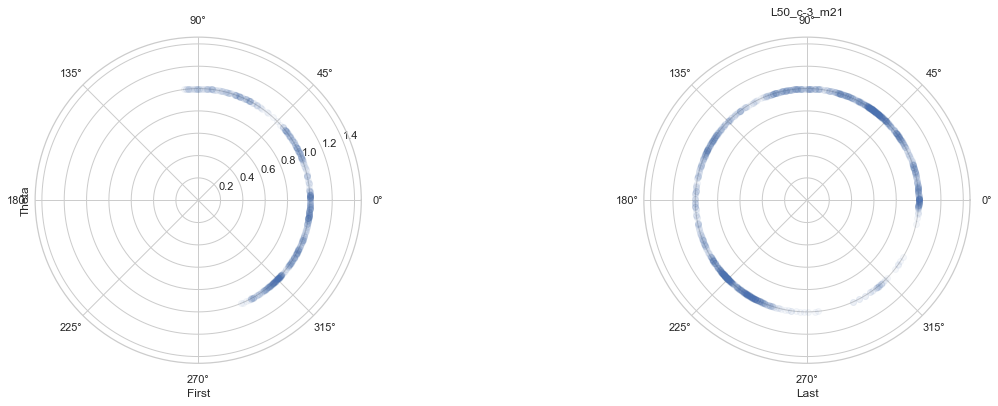

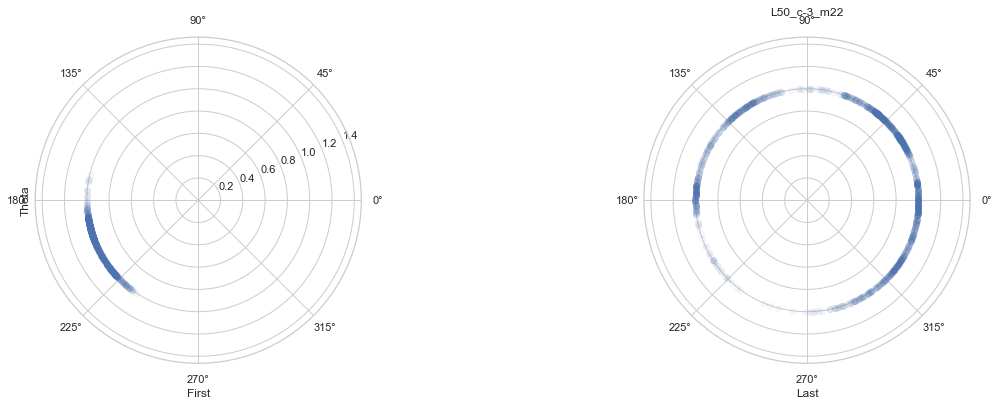

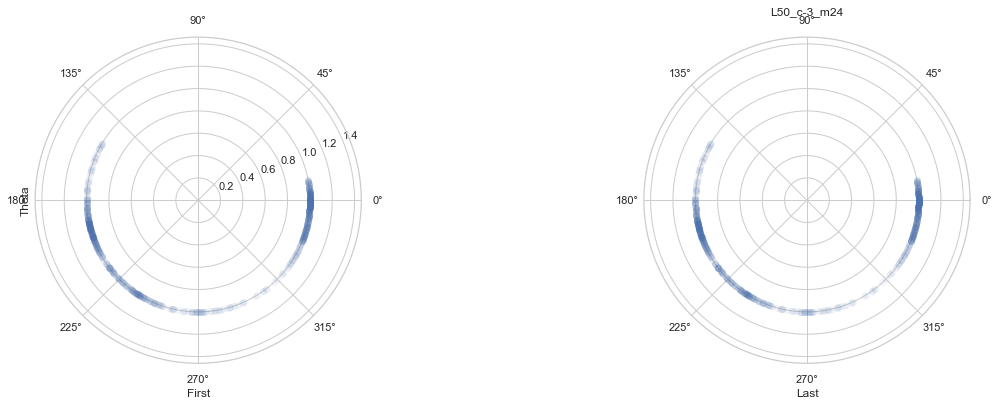

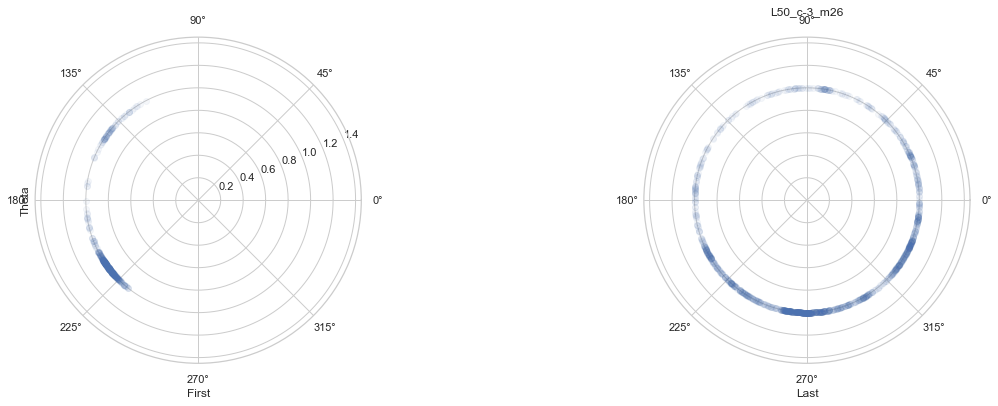

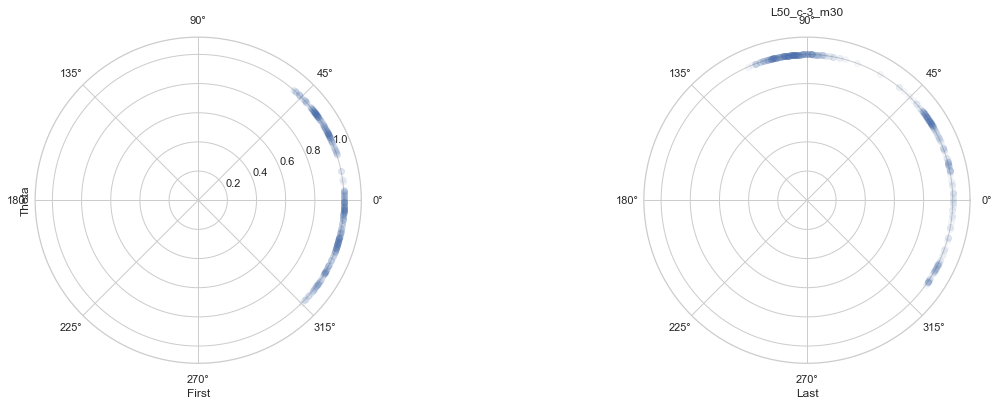

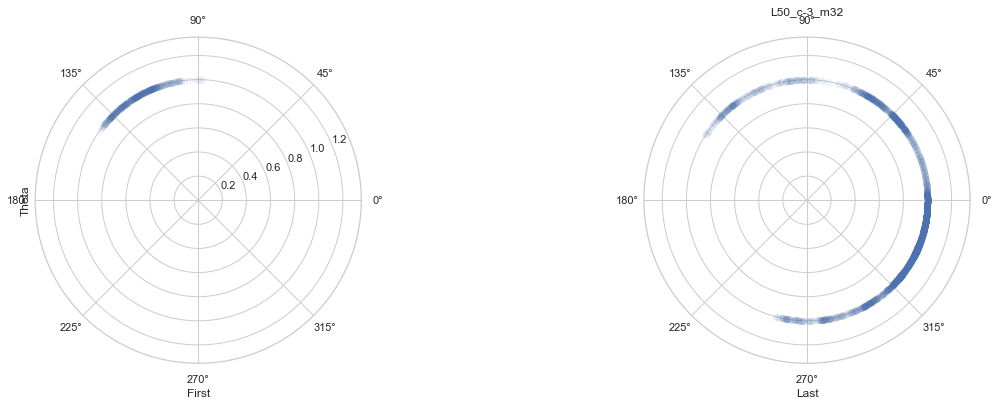

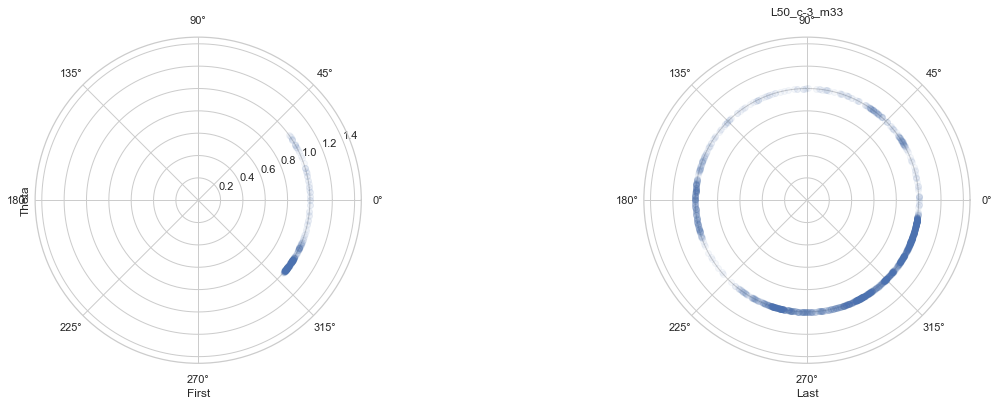

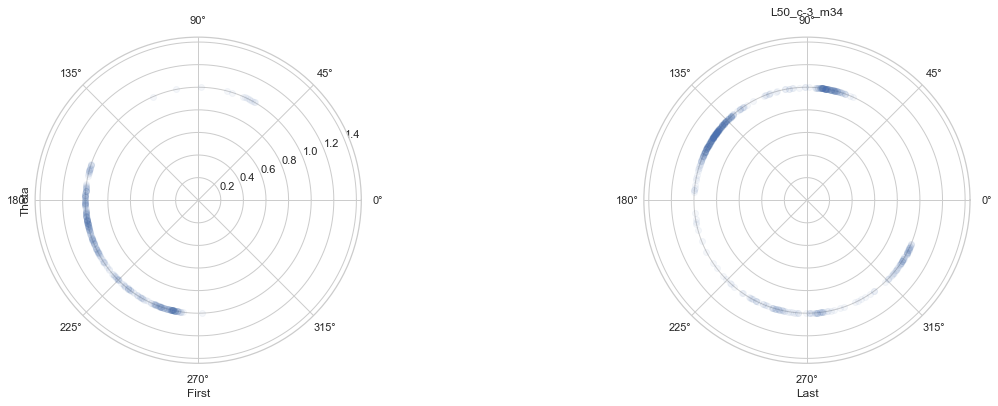

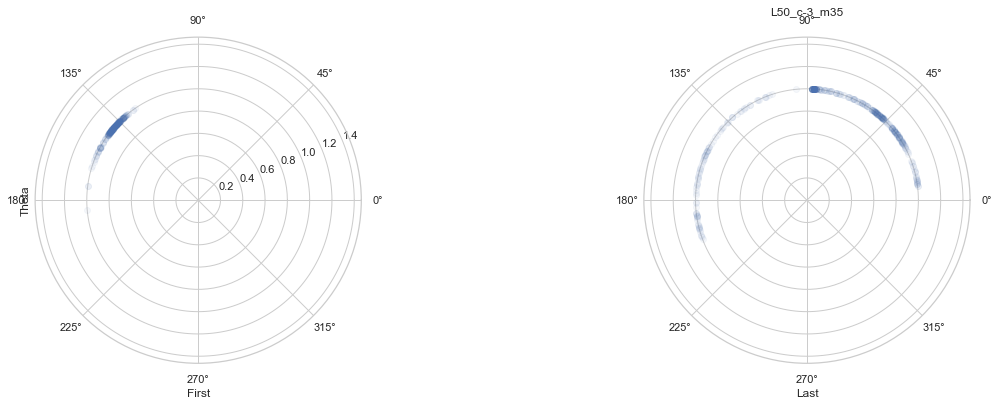

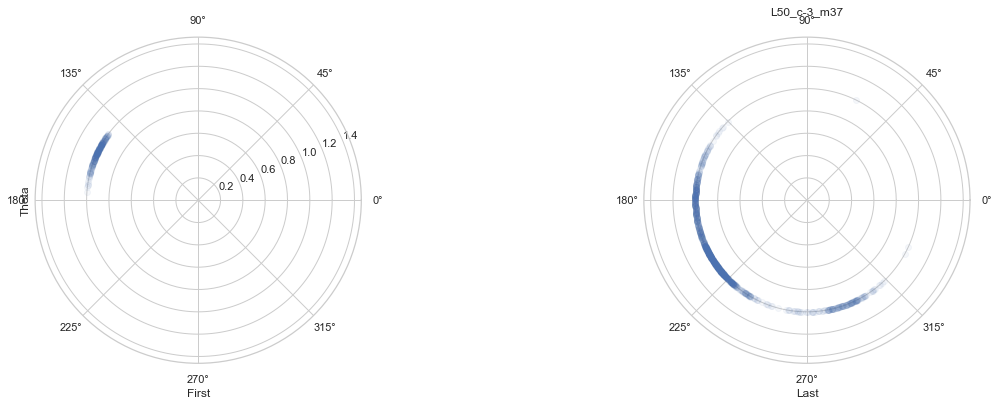

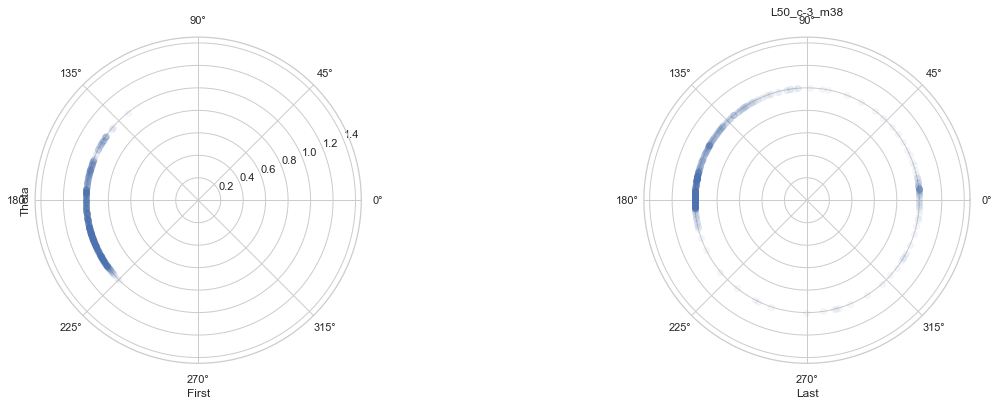

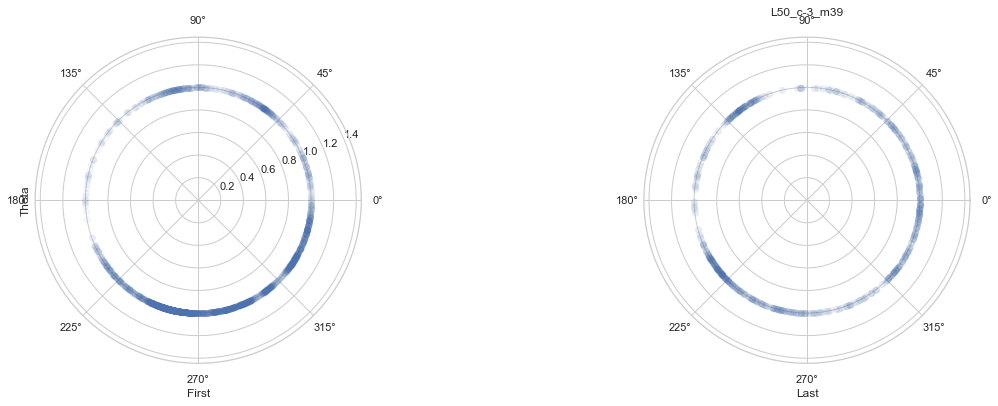

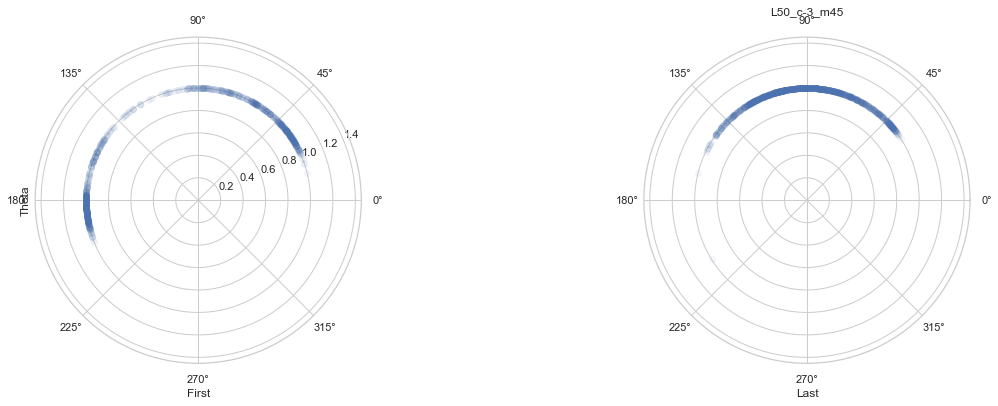

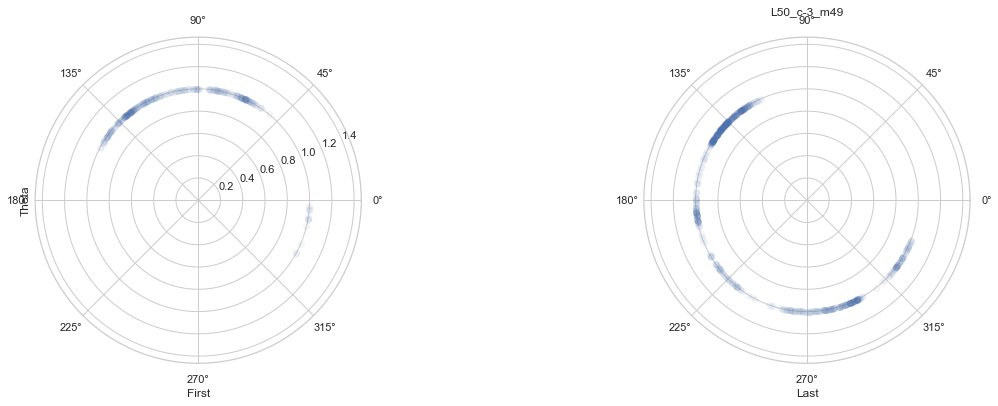

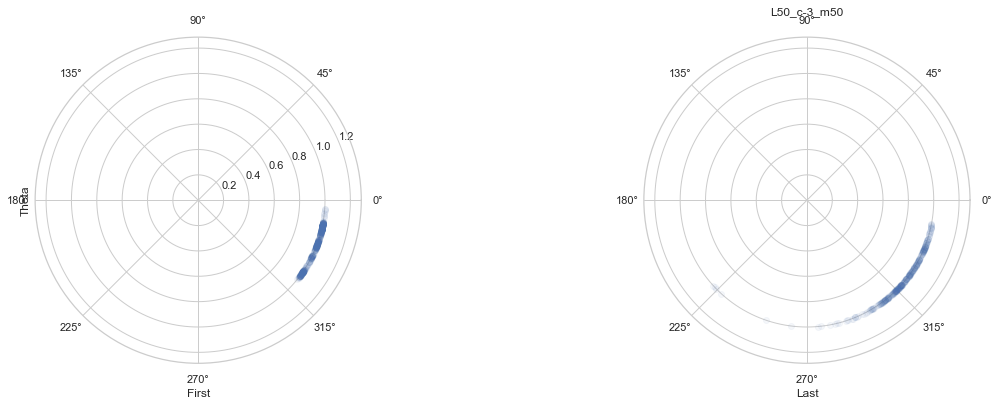

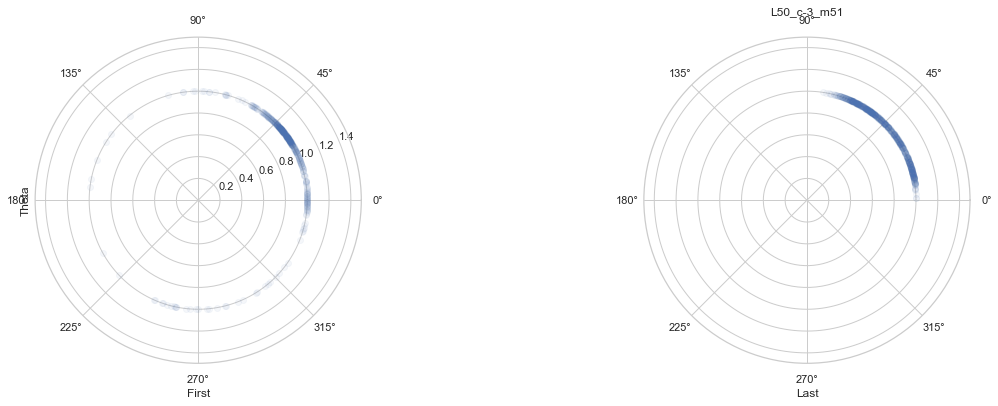

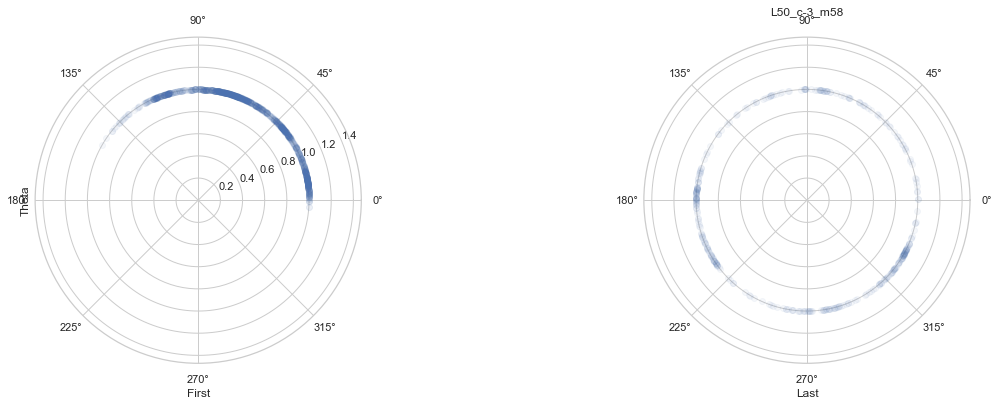

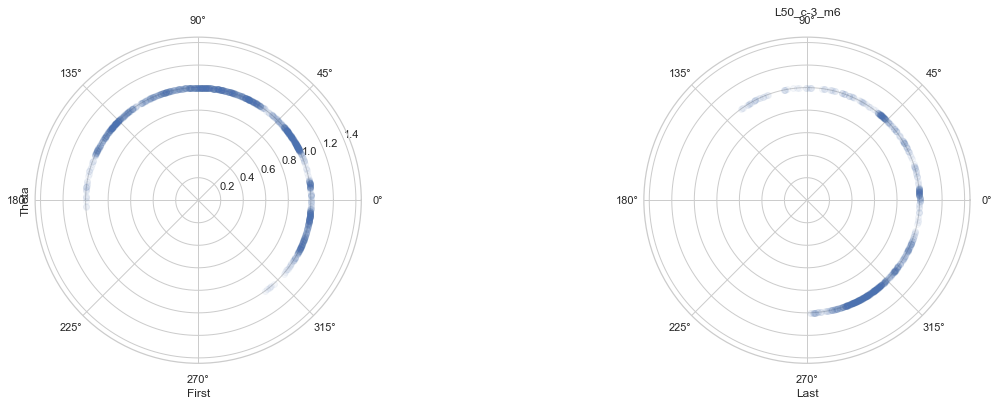

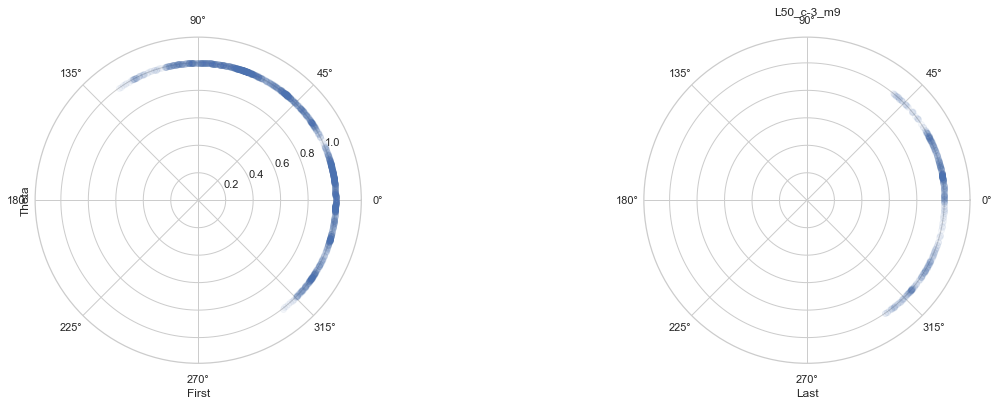

In [22]:
for name in nam_51: 

    theta_pulled_first = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('first'))].Theta * np.pi/180
    theta_pulled_last = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('last'))].Theta * np.pi/180


    rad_first_visit = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('first'))].Radial_Length
    rad_last_visit = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('last'))].Radial_Length
    

    if any(list(~np.isnan(rad_first_visit))) == True or any(list(~np.isnan(rad_last_visit))) == True:
        fig, ax = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (20,6), subplot_kw=dict(polar=True))

        radif = np.ones(len(rad_first_visit))
        radil = np.ones(len(rad_last_visit))

        ax[0].scatter(theta_pulled_first,radif, alpha = 0.05)
        ax[0].set_ylabel("Theta")
        ax[0].set_xlabel("First")
        ax[1].scatter(theta_pulled_last,radil, alpha = 0.05)
        ax[1].set_title(name)
        ax[1].set_xlabel("Last")
        plt.savefig(out_path + "\\Kinematics\Theta\\" + name + ".png")
    else:
        print(name)
    


L0.1_c-3_m10


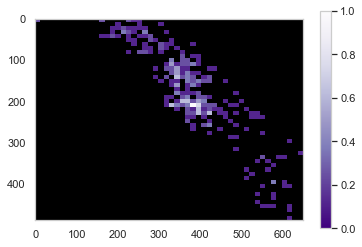

L0.1_c-3_m12


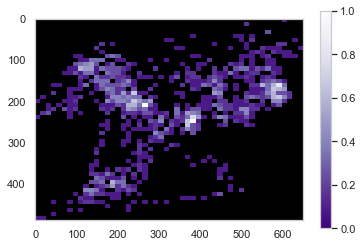

L0.1_c-3_m20


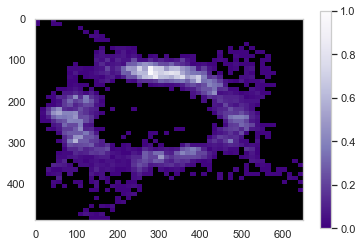

L0.1_c-3_m21


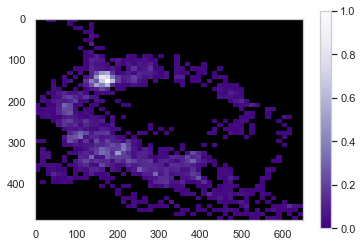

L0.1_c-3_m22


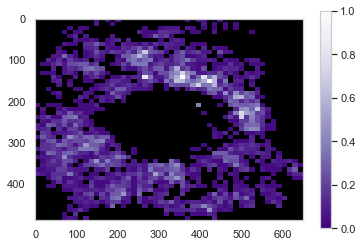

L0.1_c-3_m23


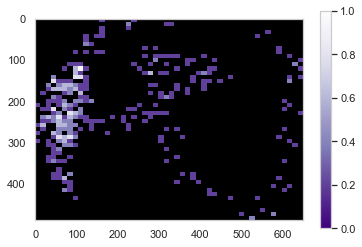

L0.1_c-3_m24


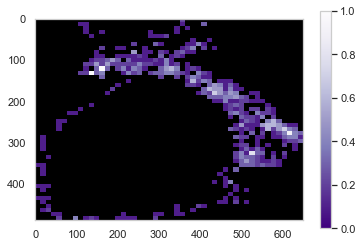

L0.1_c-3_m25


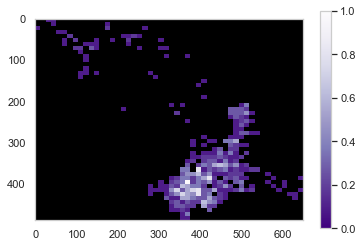

L0.1_c-3_m27


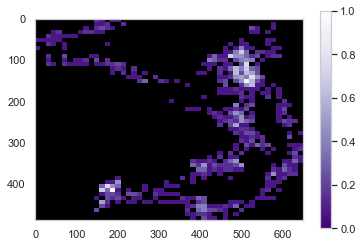

L0.1_c-3_m2


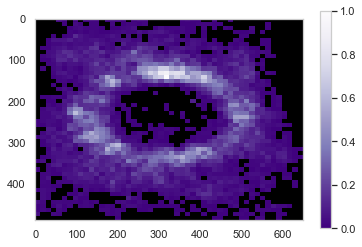

L0.1_c-3_m32


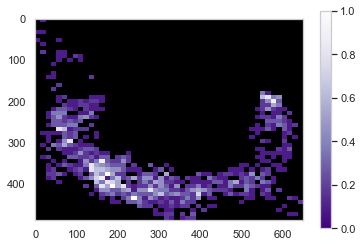

L0.1_c-3_m34


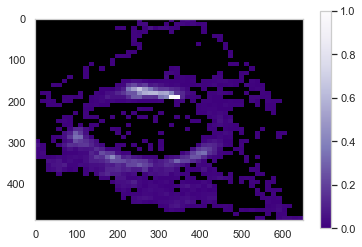

L0.1_c-3_m37


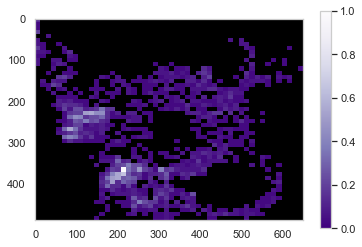

L0.1_c-3_m38


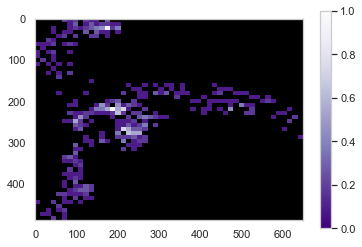

L0.1_c-3_m39


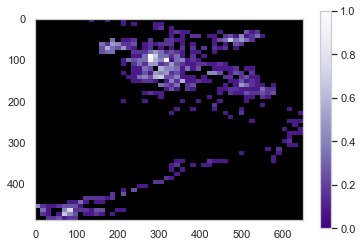

L0.1_c-3_m40


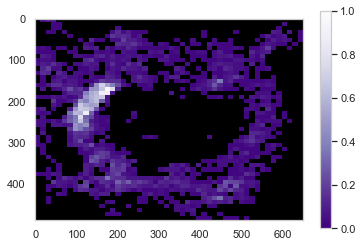

L0.1_c-3_m41


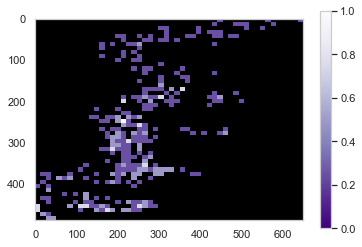

L0.1_c-3_m43


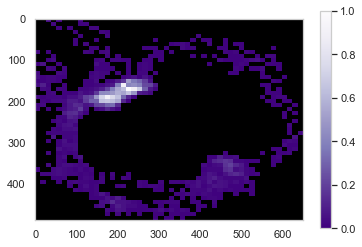

L0.1_c-3_m44


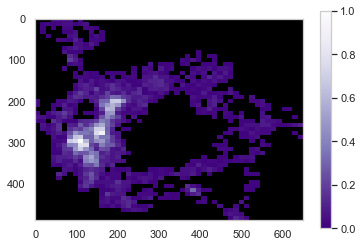

L0.1_c-3_m45


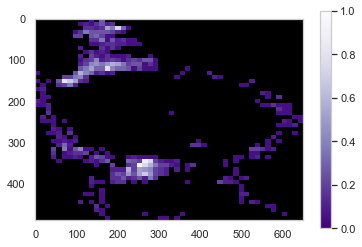

L0.1_c-3_m46


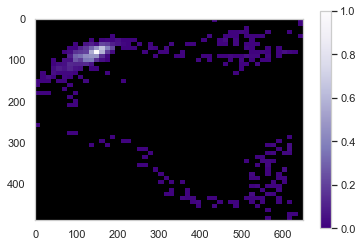

L0.1_c-3_m47


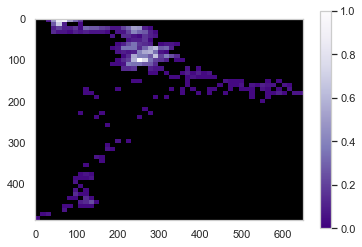

L0.1_c-3_m48


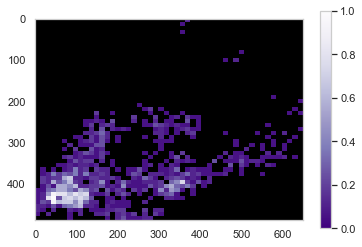

L0.1_c-3_m49


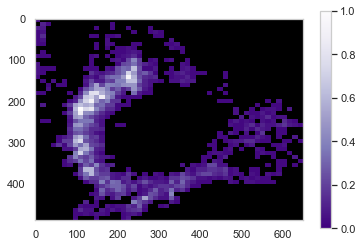

L0.1_c-3_m50


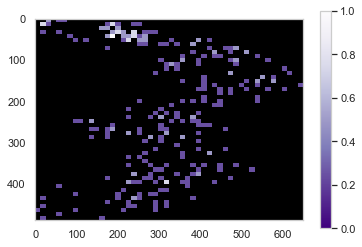

L0.1_c-3_m54


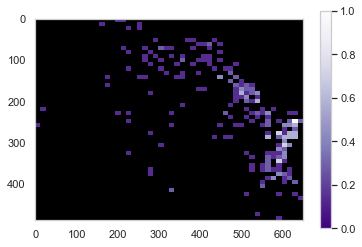

L0.1_c-3_m57


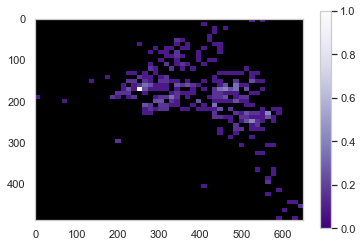

L0.1_c-3_m5


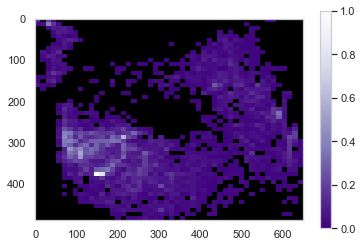

L0.1_c-3_m8


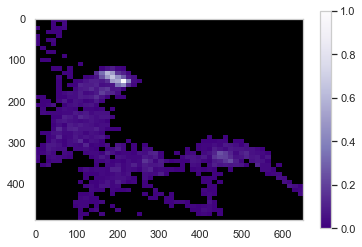

L50_c-3_m10


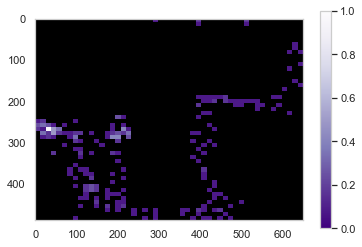

L50_c-3_m12


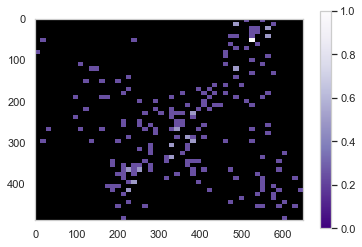

L50_c-3_m13


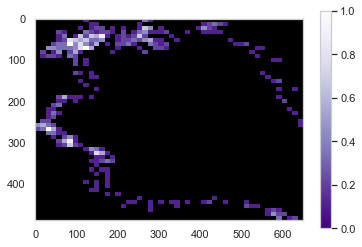

L50_c-3_m14


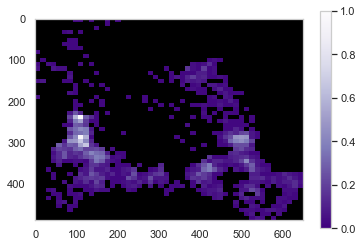

L50_c-3_m15


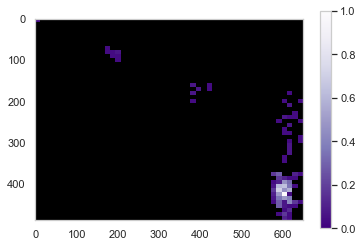

L50_c-3_m21


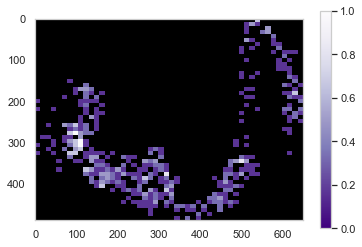

L50_c-3_m22


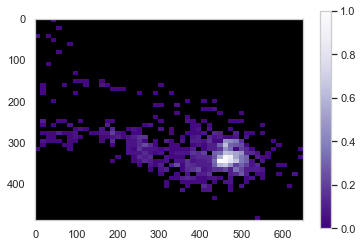

L50_c-3_m24


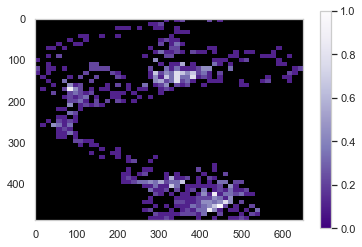

L50_c-3_m26


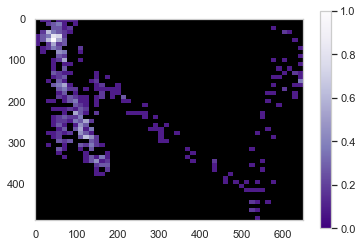

L50_c-3_m2


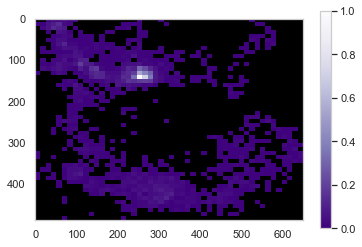

L50_c-3_m30


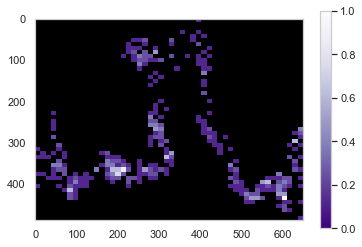

L50_c-3_m32


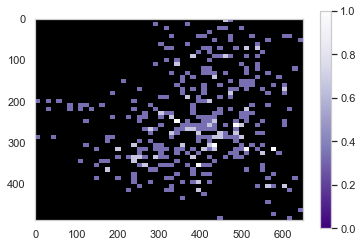

L50_c-3_m33


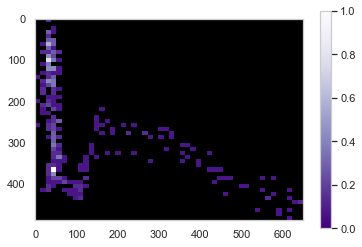

L50_c-3_m34


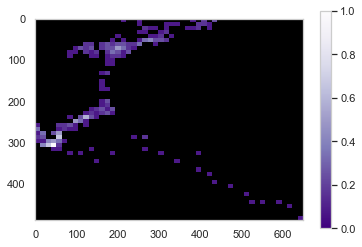

L50_c-3_m35


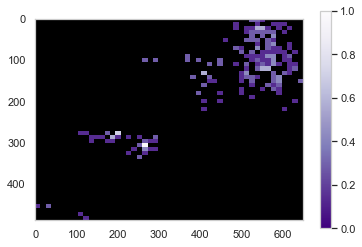

L50_c-3_m37


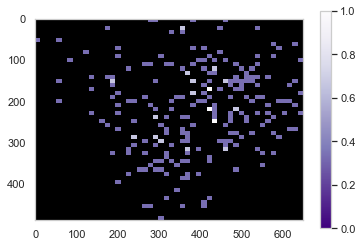

L50_c-3_m38


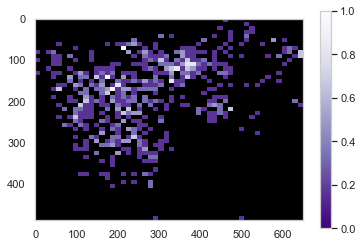

L50_c-3_m39


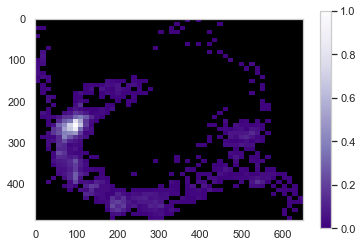

L50_c-3_m45


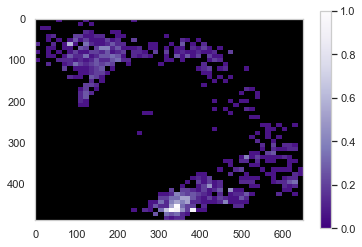

L50_c-3_m49


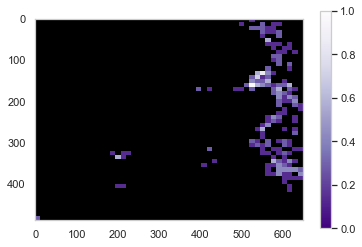

L50_c-3_m50


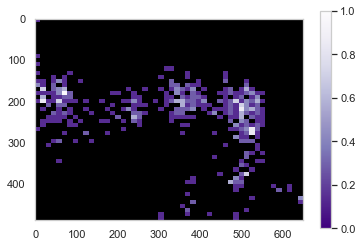

L50_c-3_m51


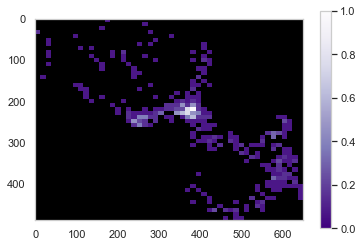

L50_c-3_m58


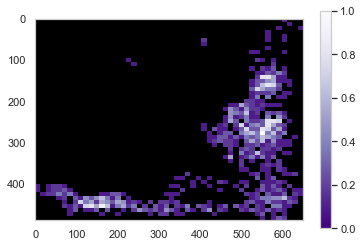

L50_c-3_m6


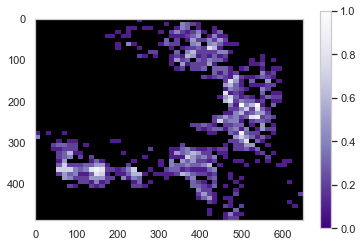

L50_c-3_m9


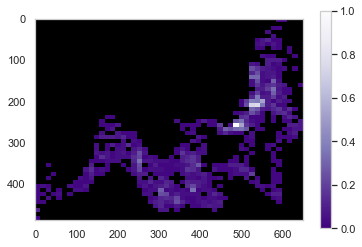

In [23]:
# Generate some test data
outpath_fig_first = r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\HeatMap\First"
dataf = pd.DataFrame()
first_heat_list = ['L0.1_c-3_m10', 'L0.1_c-3_m12', 'L0.1_c-3_m20', 'L0.1_c-3_m21',
       'L0.1_c-3_m22', 'L0.1_c-3_m23', 'L0.1_c-3_m24', 'L0.1_c-3_m25',
       'L0.1_c-3_m27', 'L0.1_c-3_m2', 'L0.1_c-3_m32', 'L0.1_c-3_m34',
       'L0.1_c-3_m37', 'L0.1_c-3_m38', 'L0.1_c-3_m39', 'L0.1_c-3_m40',
       'L0.1_c-3_m41', 'L0.1_c-3_m43', 'L0.1_c-3_m44', 'L0.1_c-3_m45',
       'L0.1_c-3_m46', 'L0.1_c-3_m47', 'L0.1_c-3_m48', 'L0.1_c-3_m49',
       'L0.1_c-3_m50', 'L0.1_c-3_m54', 'L0.1_c-3_m57', 'L0.1_c-3_m5',
       'L0.1_c-3_m8', 'L50_c-3_m10', 'L50_c-3_m12', 'L50_c-3_m13',
       'L50_c-3_m14', 'L50_c-3_m15', 'L50_c-3_m21', 'L50_c-3_m22',
       'L50_c-3_m24', 'L50_c-3_m26', 'L50_c-3_m2',
       'L50_c-3_m30', 'L50_c-3_m32', 'L50_c-3_m33', 'L50_c-3_m34',
       'L50_c-3_m35', 'L50_c-3_m37', 'L50_c-3_m38', 'L50_c-3_m39',
       'L50_c-3_m45', 'L50_c-3_m49', 'L50_c-3_m50', 'L50_c-3_m51',
       'L50_c-3_m58', 'L50_c-3_m6', 'L50_c-3_m9']

for name in first_heat_list:
    print(name)
    
    
    temp = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('first'))]
    x = temp.loc[temp.X_position.notnull(), 'X_position']
    y = temp.loc[temp.X_position.notnull(), 'Y_position']

   

    heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
    heatmap = heatmap/heatmap.max()
    extent = [0, 648, 488, 0]

    
    hmv_first = pd.Series(heatmap.flatten(),name=name)
    
    dataf = dataf.append(hmv_first)
#     dataf.to_csv(pca_path + "\heatmap_vectors_first.csv")

    plt.clf()
    plt.grid(False)
    cmap = plt.cm.Purples_r
    cmap.set_under(color='black')
    im = plt.imshow(heatmap, extent=extent, origin='upper', cmap = cmap, vmin = 0.0000000000001)
    plt.colorbar(im)
#     plt.savefig(outpath_fig_first + "\\" + name + "FirstTrial_HeatMap.png")
    plt.show()

In [24]:
low = np.zeros((50,50))
high = np.zeros((50,50))
for name in first_heat_list:
    print(name)
    
    if name.startswith('L0.1'):
        temp = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('first'))]
        x = temp.loc[temp.X_position.notnull(), 'X_position']
        y = temp.loc[temp.X_position.notnull(), 'Y_position']



        heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
        heatmap = heatmap/heatmap.max()
        extent = [0, 648, 488, 0]


       

       

        low = low + heatmap 
    elif name.startswith('L50'):
        temp = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('first'))]
        x = temp.loc[temp.X_position.notnull(), 'X_position']
        y = temp.loc[temp.X_position.notnull(), 'Y_position']



        heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
        heatmap = heatmap/heatmap.max()
        extent = [0, 648, 488, 0]


        

        high = high + heatmap 


L0.1_c-3_m10
L0.1_c-3_m12
L0.1_c-3_m20
L0.1_c-3_m21
L0.1_c-3_m22
L0.1_c-3_m23
L0.1_c-3_m24
L0.1_c-3_m25
L0.1_c-3_m27
L0.1_c-3_m2
L0.1_c-3_m32
L0.1_c-3_m34
L0.1_c-3_m37
L0.1_c-3_m38
L0.1_c-3_m39
L0.1_c-3_m40
L0.1_c-3_m41
L0.1_c-3_m43
L0.1_c-3_m44
L0.1_c-3_m45
L0.1_c-3_m46
L0.1_c-3_m47
L0.1_c-3_m48
L0.1_c-3_m49
L0.1_c-3_m50
L0.1_c-3_m54
L0.1_c-3_m57
L0.1_c-3_m5
L0.1_c-3_m8
L50_c-3_m10
L50_c-3_m12
L50_c-3_m13
L50_c-3_m14
L50_c-3_m15
L50_c-3_m21
L50_c-3_m22
L50_c-3_m24
L50_c-3_m26
L50_c-3_m2
L50_c-3_m30
L50_c-3_m32
L50_c-3_m33
L50_c-3_m34
L50_c-3_m35
L50_c-3_m37
L50_c-3_m38
L50_c-3_m39
L50_c-3_m45
L50_c-3_m49
L50_c-3_m50
L50_c-3_m51
L50_c-3_m58
L50_c-3_m6
L50_c-3_m9


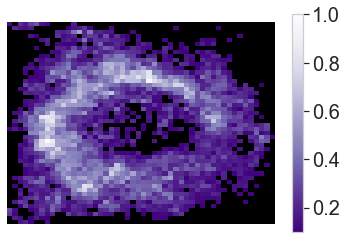

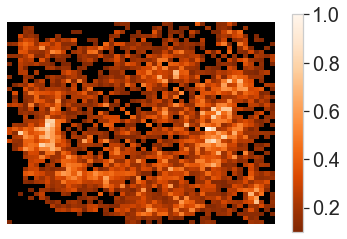

In [25]:
low = low/low.max()
high = high/high.max()
plt.clf()
plt.grid(False)
plt.tick_params(labelsize = 20)
cmap = plt.cm.Purples_r
cmap.set_under(color='black')
im = plt.imshow(low, extent=extent, origin='upper', cmap = cmap, vmin = 0.1 )
clr = plt.colorbar(im)
clr.ax.tick_params(labelsize=20)
plt.axis('off')
plt.savefig(out_path + "\\Heatmap\\Low_FirstTrial_HeatMap.png")
plt.show()
plt.clf()
plt.grid(False)
plt.tick_params(labelsize = 20)
cmap = plt.cm.Oranges_r
cmap.set_under(color='black')
im = plt.imshow(high, extent=extent, origin='upper', cmap = cmap, vmin = 0.1)
clr = plt.colorbar(im)
clr.ax.tick_params(labelsize=20)
plt.axis('off')
plt.savefig(out_path + "\\Heatmap\\High_FirstTrial_HeatMap.png")
plt.show()

L0.1_c-3_m10


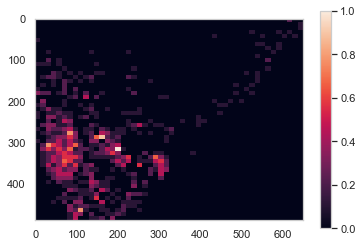

L0.1_c-3_m12


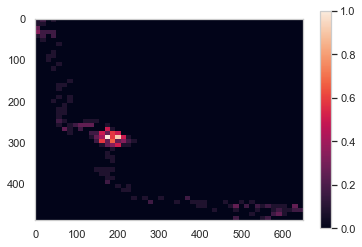

L0.1_c-3_m20


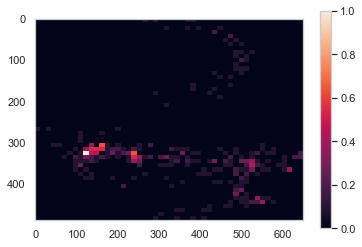

L0.1_c-3_m21


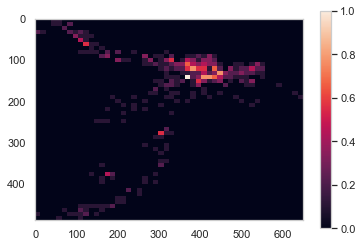

L0.1_c-3_m22


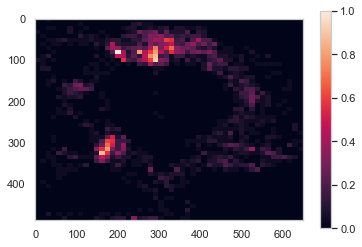

L0.1_c-3_m23


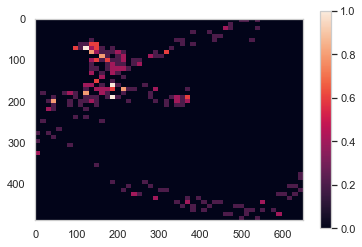

L0.1_c-3_m25


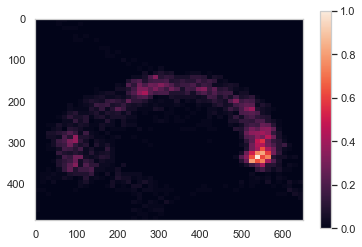

L0.1_c-3_m27


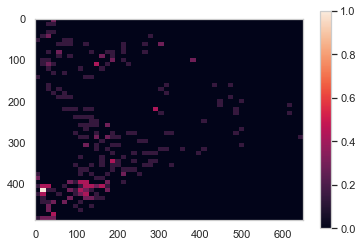

L0.1_c-3_m2


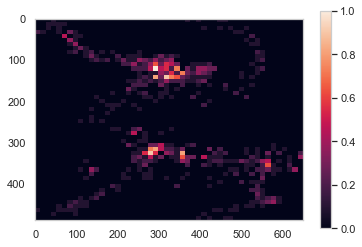

L0.1_c-3_m32


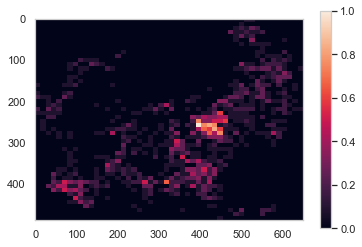

L0.1_c-3_m34


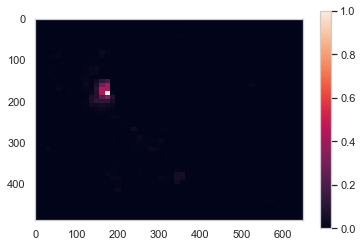

L0.1_c-3_m37


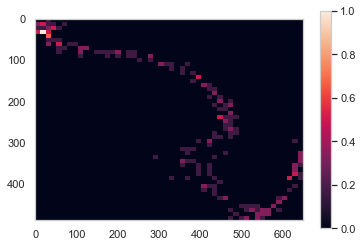

L0.1_c-3_m38


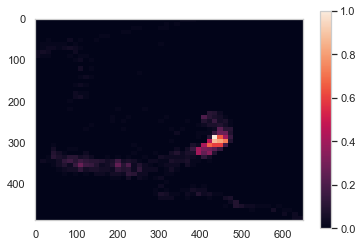

L0.1_c-3_m40


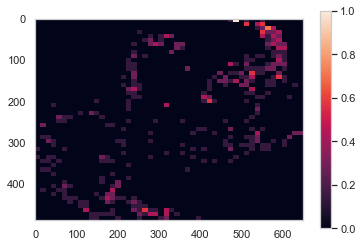

L0.1_c-3_m41


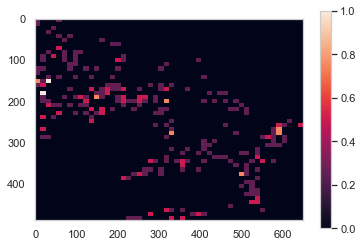

L0.1_c-3_m43


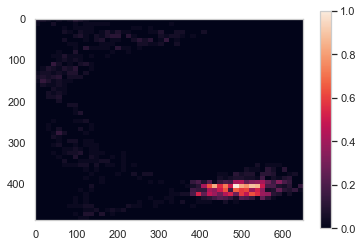

L0.1_c-3_m44


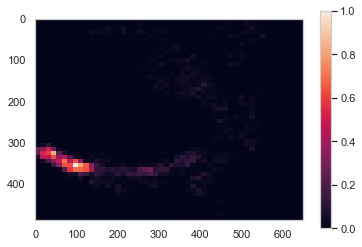

L0.1_c-3_m45


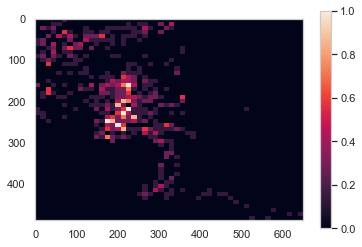

L0.1_c-3_m46


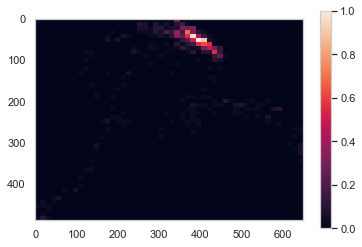

L0.1_c-3_m47


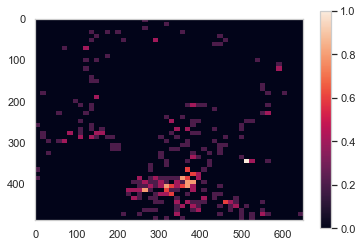

L0.1_c-3_m48


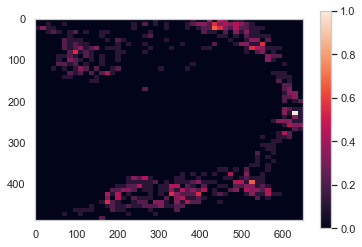

L0.1_c-3_m49


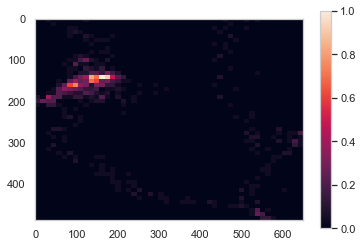

L0.1_c-3_m50


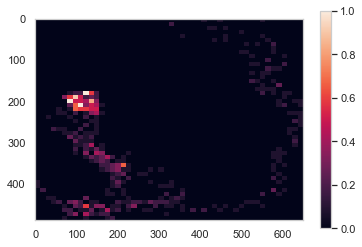

L0.1_c-3_m54


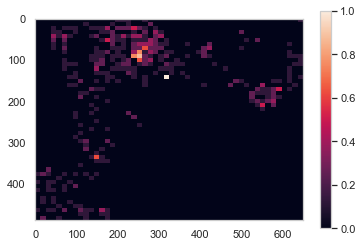

L0.1_c-3_m57


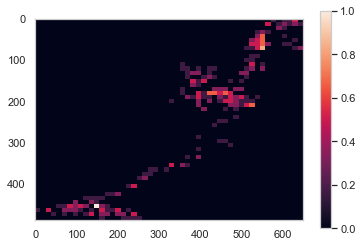

L0.1_c-3_m5


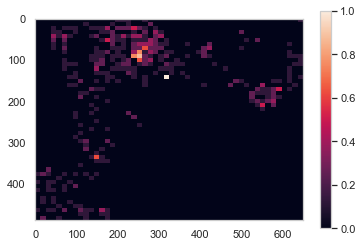

L0.1_c-3_m8


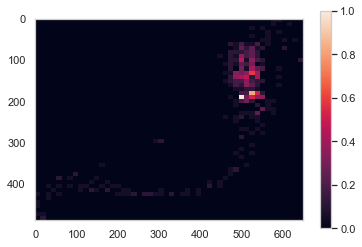

L50_c-3_m10


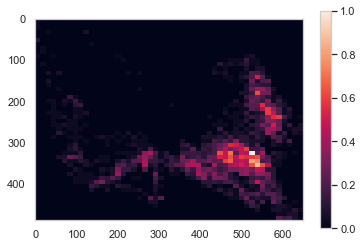

L50_c-3_m12


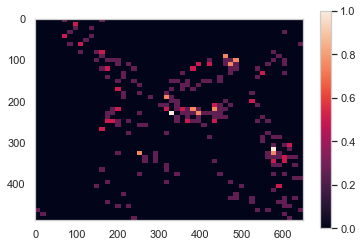

L50_c-3_m13


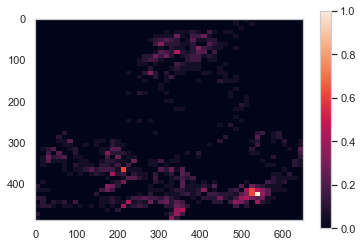

L50_c-3_m14


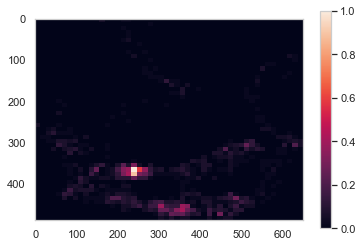

L50_c-3_m15


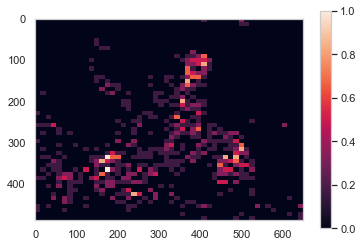

L50_c-3_m21


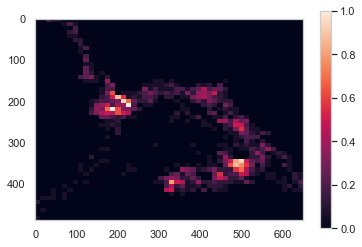

L50_c-3_m22


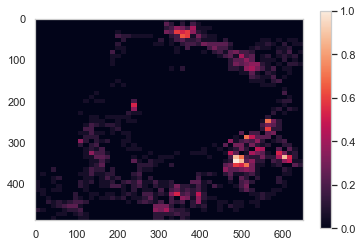

L50_c-3_m26


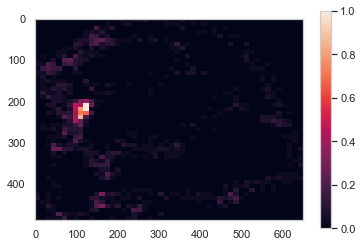

L50_c-3_m2


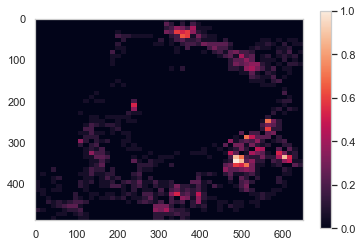

L50_c-3_m30


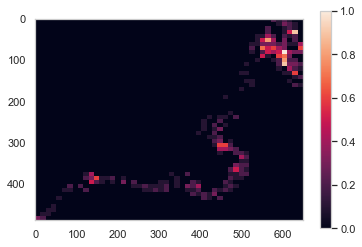

L50_c-3_m32


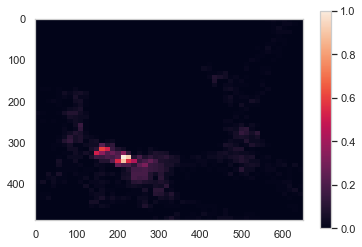

L50_c-3_m33


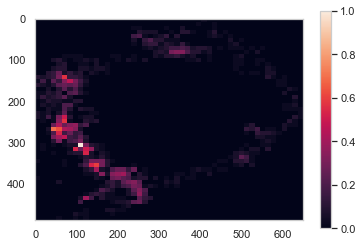

L50_c-3_m34


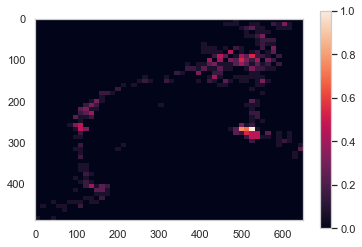

L50_c-3_m35


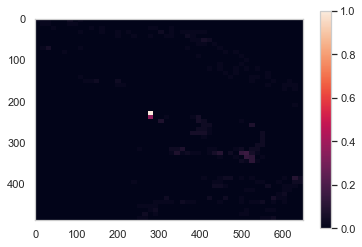

L50_c-3_m37


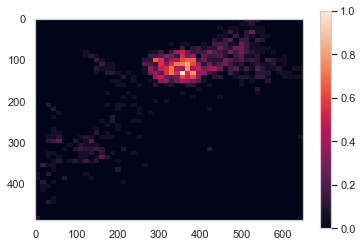

L50_c-3_m38


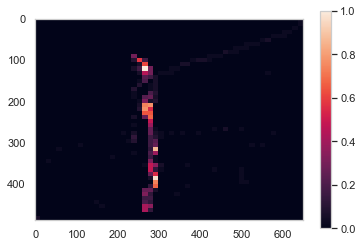

L50_c-3_m39


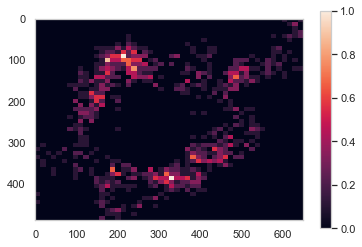

L50_c-3_m45


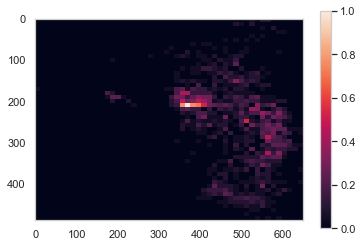

L50_c-3_m6


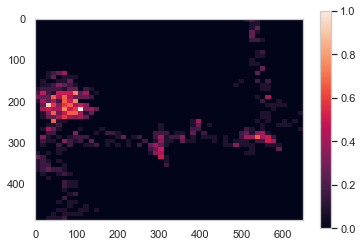

L50_c-3_m9


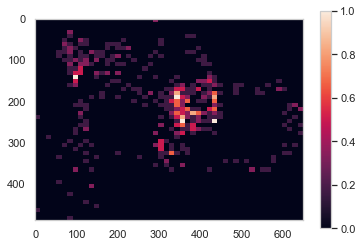

L50_c-3_m49


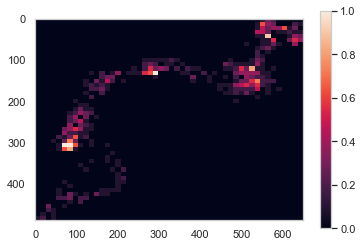

L50_c-3_m50


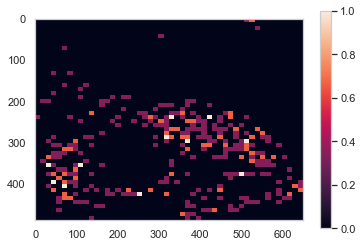

L50_c-3_m51


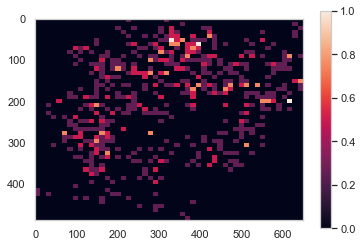

L50_c-3_m58


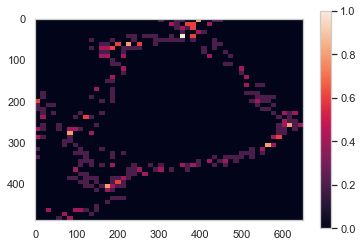

In [26]:
# Generate some test data
# outpath_fig_last = r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\HeatMap\Last"
dataf = pd.DataFrame()
last_heat_list = ['L0.1_c-3_m10','L0.1_c-3_m12','L0.1_c-3_m20','L0.1_c-3_m21',
                  'L0.1_c-3_m22','L0.1_c-3_m23','L0.1_c-3_m25','L0.1_c-3_m27', 
'L0.1_c-3_m2', 'L0.1_c-3_m32','L0.1_c-3_m34','L0.1_c-3_m37','L0.1_c-3_m38','L0.1_c-3_m40','L0.1_c-3_m41','L0.1_c-3_m43',
'L0.1_c-3_m44','L0.1_c-3_m45','L0.1_c-3_m46','L0.1_c-3_m47','L0.1_c-3_m48','L0.1_c-3_m49','L0.1_c-3_m50','L0.1_c-3_m54',
'L0.1_c-3_m57','L0.1_c-3_m5','L0.1_c-3_m8','L50_c-3_m10','L50_c-3_m12','L50_c-3_m13','L50_c-3_m14','L50_c-3_m15','L50_c-3_m21',
'L50_c-3_m22','L50_c-3_m26','L50_c-3_m2','L50_c-3_m30','L50_c-3_m32','L50_c-3_m33','L50_c-3_m34','L50_c-3_m35','L50_c-3_m37', 
'L50_c-3_m38','L50_c-3_m39','L50_c-3_m45','L50_c-3_m6','L50_c-3_m9','L50_c-3_m49','L50_c-3_m50','L50_c-3_m51','L50_c-3_m58']

for name in last_heat_list:
    print(name)
    
    temp = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('last'))]
    x = temp.loc[temp.X_position.notnull(), 'X_position']
    y = temp.loc[temp.X_position.notnull(), 'Y_position']

   

    heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
    heatmap = heatmap/heatmap.max()
    extent = [0, 648, 488, 0]

    
    hmv_first = pd.Series(heatmap.flatten(),name=name)
    
    dataf = dataf.append(hmv_first)
#     dataf.to_csv(pca_path + "\heatmap_vectors_last.csv")

    plt.clf()
    plt.grid(False)
    im = plt.imshow(heatmap, extent=extent, origin='upper')
    plt.colorbar(im)
#     plt.savefig(outpath_fig_last + "\\" + name + "LastTrial_HeatMap.png")
    plt.show()

L0.1_c-3_m10
L0.1_c-3_m12
L0.1_c-3_m20
L0.1_c-3_m21
L0.1_c-3_m22
L0.1_c-3_m23
L0.1_c-3_m25
L0.1_c-3_m27
L0.1_c-3_m2
L0.1_c-3_m32
L0.1_c-3_m34
L0.1_c-3_m37
L0.1_c-3_m38
L0.1_c-3_m40
L0.1_c-3_m41
L0.1_c-3_m43
L0.1_c-3_m44
L0.1_c-3_m45
L0.1_c-3_m46
L0.1_c-3_m47
L0.1_c-3_m48
L0.1_c-3_m49
L0.1_c-3_m50
L0.1_c-3_m54
L0.1_c-3_m57
L0.1_c-3_m5
L0.1_c-3_m8
L50_c-3_m10
L50_c-3_m12
L50_c-3_m13
L50_c-3_m14
L50_c-3_m15
L50_c-3_m21
L50_c-3_m22
L50_c-3_m26
L50_c-3_m2
L50_c-3_m30
L50_c-3_m32
L50_c-3_m33
L50_c-3_m34
L50_c-3_m35
L50_c-3_m37
L50_c-3_m38
L50_c-3_m39
L50_c-3_m45
L50_c-3_m6
L50_c-3_m9
L50_c-3_m49
L50_c-3_m50
L50_c-3_m51
L50_c-3_m58


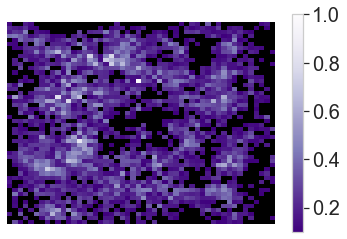

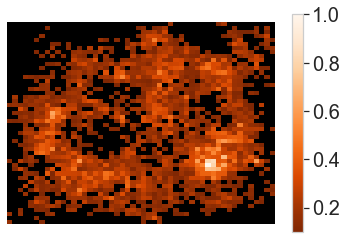

In [27]:
low = np.zeros((50,50))
high = np.zeros((50,50))
for name in last_heat_list:
    print(name)
    
    if name.startswith('L0.1'):
        temp = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('last'))]
        x = temp.loc[temp.X_position.notnull(), 'X_position']
        y = temp.loc[temp.X_position.notnull(), 'Y_position']



        heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
        heatmap = heatmap/heatmap.max()
        extent = [0, 648, 488, 0]


        

        low = low + heatmap 
    elif name.startswith('L50'):
        temp = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('last'))]
        x = temp.loc[temp.X_position.notnull(), 'X_position']
        y = temp.loc[temp.X_position.notnull(), 'Y_position']



        heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
        heatmap = heatmap/heatmap.max()
        extent = [0, 648, 488, 0]


        

        high = high + heatmap 
        
low = low/low.max()
high = high/high.max()
plt.clf()
plt.grid(False)
plt.tick_params(labelsize = 20)
cmap = plt.cm.Purples_r
cmap.set_under(color='black')
im = plt.imshow(low, extent=extent, origin='upper', cmap = cmap, vmin = 0.1 )
clr = plt.colorbar(im)
clr.ax.tick_params(labelsize=20)
plt.axis('off')
plt.savefig(out_path + "\\Heatmap\\Low_LastTrial_HeatMap.png")
plt.show()
plt.clf()
plt.grid(False)
plt.tick_params(labelsize = 20)
cmap = plt.cm.Oranges_r
cmap.set_under(color='black')
im = plt.imshow(high, extent=extent, origin='upper', cmap = cmap, vmin = 0.1)
clr = plt.colorbar(im)
clr.ax.tick_params(labelsize=20)
plt.axis('off')
plt.savefig(out_path+ "\\Heatmap\\High_LastTrial_HeatMap.png")
plt.show()